### The following notebook accomplishes the following things:
1. Extracts the results from the observations file 
2. Creates the input file for initial conditions based on the spinup observations

- The following files are based on the scenario I as described in - D:\Seafile_folders\Seafile\My Library\Hannover_PhD\Work\ATS\RKModel\RKModel_info_simulation_strategy.xlsx\Spin_up_strategy

In [1]:
%matplotlib inline
import sys,os
import ats_xdmf
import plot_column_data
import colors
import numpy as np
import matplotlib.cm
from matplotlib import pyplot as plt
import h5py
import pandas as pd
import matplotlib.gridspec as gridspec

### Observation data

In [2]:
df_obs_AWS = pd.read_csv('/home/rk/ats_rk/testing/ats-demos/rk_model/Data/Data_Yakou/Yakou_met_data_ITP_rk/Final_OutputData_4yrs/Calib_outputdata_2016_2018.csv',sep='\t')
df_obs_AWS.head()

,TIMESTAMP,Soil moisture at - 0.04 m (%),Soil moisture at - 0.1 m (%),Soil moisture at - 0.2 m (%),Soil moisture at - 0.4 m (%),Soil moisture at - 0.8 m (%),Soil moisture at - 1.2 m (%),Soil moisture at - 1.6 m (%),Soil temperature at - 0.00 m (°C),Soil temperature at - 0.04 m (°C),Soil temperature at - 0.1 m (°C),Soil temperature at - 0.2 m (°C),Soil temperature at - 0.4 m (°C),Soil temperature at - 0.8 m (°C),Soil temperature at - 1.2 m (°C),Soil temperature at - 1.6 m (°C)
0,2016-01-01,7.897694,7.523868,8.694236,9.016111,5.368792,4.093549,6.058042,-13.103958,-12.507847,-11.848819,-11.295486,-9.824722,-7.814958,-4.874889,-3.447965
1,2016-01-02,7.991826,7.594250,8.745417,9.012639,5.350889,4.060958,6.008417,-12.255417,-11.861597,-11.342569,-10.947708,-9.781389,-7.936854,-5.063889,-3.639549
2,2016-01-03,7.992500,7.606875,8.766806,9.033472,5.342833,4.033590,5.962187,-12.737500,-11.824514,-11.200694,-10.765278,-9.618403,-7.946111,-5.228028,-3.817500
3,2016-01-04,7.960069,7.581465,8.749236,9.025833,5.336757,4.012583,5.923819,-13.006597,-11.997847,-11.365486,-10.867778,-9.648889,-7.977951,-5.358771,-3.977958
4,2016-01-05,7.913792,7.539000,8.703056,8.995694,5.324597,3.993715,5.892174,-13.525278,-12.371597,-11.691181,-11.171181,-9.829653,-8.078194,-5.476889,-4.119438


In [21]:
df_observation.columns

Index(['time [s]', 'point -0.04 temperature [K]', 'point -0.1 temperature [K]',
       'point -0.2 temperature [K]', 'point -0.4 temperature [K]',
       'point -0.8 temperature [K]', 'point -1.2 temperature [K]',
       'point -1.6 temperature [K]', 'point -5.0 temperature [K]',
       'point -10.0 temperature [K]', 'point -20.0 temperature [K]',
       'point -30.0 temperature [K]', 'point -40.0 temperature [K]',
       'point -0.04 saturation liquid', 'point -0.1 saturation liquid',
       'point -0.2 saturation liquid', 'point -0.4 saturation liquid',
       'point -0.8 saturation liquid', 'point -1.2 saturation liquid',
       'point -1.6 saturation liquid', 'point -5.0 saturation liquid',
       'point -10.0 saturation liquid', 'point -20.0 saturation liquid',
       'point -30.0 saturation liquid', 'point -40.0 saturation liquid',
       'point -0.01 saturation ice', 'point -0.04 saturation ice',
       'point -0.1 saturation ice', 'point -0.2 saturation ice',
       'point -0.4

In [23]:
### Temperature from degree celcius to Kelvin

depths = [0.04, 0.1, 0.2, 0.4, 0.8, 1.2, 1.6]

for i, depth in enumerate(depths):
    df_obs_AWS[f'point -{depth} temperature [K]'] = df_obs_AWS[f'Soil temperature at - {depth} m (°C)'] + 273.15
    
df_obs_AWS.head()

,TIMESTAMP,Soil moisture at - 0.04 m (%),Soil moisture at - 0.1 m (%),Soil moisture at - 0.2 m (%),Soil moisture at - 0.4 m (%),Soil moisture at - 0.8 m (%),Soil moisture at - 1.2 m (%),Soil moisture at - 1.6 m (%),Soil temperature at - 0.00 m (°C),Soil temperature at - 0.04 m (°C),...,point -0.8 saturation liquid,point -1.2 saturation liquid,point -1.6 saturation liquid,point -0.04 temperature [K],point -0.1 temperature [K],point -0.2 temperature [K],point -0.4 temperature [K],point -0.8 temperature [K],point -1.2 temperature [K],point -1.6 temperature [K]
0,2016-01-01,7.897694,7.523868,8.694236,9.016111,5.368792,4.093549,6.058042,-13.103958,-12.507847,...,0.131793,0.100488,0.148712,260.642153,261.301181,261.854514,263.325278,265.335042,268.275111,269.702035
1,2016-01-02,7.991826,7.594250,8.745417,9.012639,5.350889,4.060958,6.008417,-12.255417,-11.861597,...,0.131353,0.099688,0.147494,261.288403,261.807431,262.202292,263.368611,265.213146,268.086111,269.510451
2,2016-01-03,7.992500,7.606875,8.766806,9.033472,5.342833,4.033590,5.962187,-12.737500,-11.824514,...,0.131155,0.099016,0.146359,261.325486,261.949306,262.384722,263.531597,265.203889,267.921972,269.332500
3,2016-01-04,7.960069,7.581465,8.749236,9.025833,5.336757,4.012583,5.923819,-13.006597,-11.997847,...,0.131006,0.098500,0.145417,261.152153,261.784514,262.282222,263.501111,265.172049,267.791229,269.172042
4,2016-01-05,7.913792,7.539000,8.703056,8.995694,5.324597,3.993715,5.892174,-13.525278,-12.371597,...,0.130708,0.098037,0.144640,260.778403,261.458819,261.978819,263.320347,265.071806,267.673111,269.030562


In [60]:
####  Converting Soil moisture content to saturation of liquid

depths = [0.04, 0.1, 0.2, 0.4, 0.8, 1.2, 1.6]

depth_peat = 0.3
poro_peat = 0.501199
poro_mineral = 0.407367

for i, depth in enumerate(depths):
    if depth < depth_peat:
        df_obs_AWS[f'point -{depth} saturation liquid'] = df_obs_AWS[f'Soil moisture at - {depth} m (%)']/(poro_peat*100)
    else:
        df_obs_AWS[f'point -{depth} saturation liquid'] = df_obs_AWS[f'Soil moisture at - {depth} m (%)']/(poro_mineral*100)

In [62]:
df_obs_AWS.head()

,TIMESTAMP,Soil moisture at - 0.04 m (%),Soil moisture at - 0.1 m (%),Soil moisture at - 0.2 m (%),Soil moisture at - 0.4 m (%),Soil moisture at - 0.8 m (%),Soil moisture at - 1.2 m (%),Soil moisture at - 1.6 m (%),Soil temperature at - 0.00 m (°C),Soil temperature at - 0.04 m (°C),...,point -0.8 saturation liquid,point -1.2 saturation liquid,point -1.6 saturation liquid,point -0.04 temperature [K],point -0.1 temperature [K],point -0.2 temperature [K],point -0.4 temperature [K],point -0.8 temperature [K],point -1.2 temperature [K],point -1.6 temperature [K]
0,2016-01-01,7.897694,7.523868,8.694236,9.016111,5.368792,4.093549,6.058042,-13.103958,-12.507847,...,0.131793,0.100488,0.148712,260.642153,261.301181,261.854514,263.325278,265.335042,268.275111,269.702035
1,2016-01-02,7.991826,7.594250,8.745417,9.012639,5.350889,4.060958,6.008417,-12.255417,-11.861597,...,0.131353,0.099688,0.147494,261.288403,261.807431,262.202292,263.368611,265.213146,268.086111,269.510451
2,2016-01-03,7.992500,7.606875,8.766806,9.033472,5.342833,4.033590,5.962187,-12.737500,-11.824514,...,0.131155,0.099016,0.146359,261.325486,261.949306,262.384722,263.531597,265.203889,267.921972,269.332500
3,2016-01-04,7.960069,7.581465,8.749236,9.025833,5.336757,4.012583,5.923819,-13.006597,-11.997847,...,0.131006,0.098500,0.145417,261.152153,261.784514,262.282222,263.501111,265.172049,267.791229,269.172042
4,2016-01-05,7.913792,7.539000,8.703056,8.995694,5.324597,3.993715,5.892174,-13.525278,-12.371597,...,0.130708,0.098037,0.144640,260.778403,261.458819,261.978819,263.320347,265.071806,267.673111,269.030562


<AxesSubplot:>

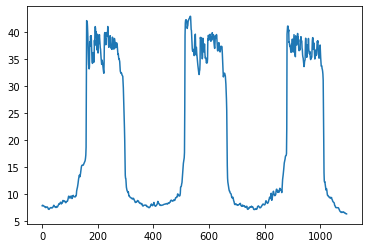

In [71]:
df_obs_AWS['Soil moisture at - 0.04 m (%)'].plot()

### Static spinup

#### 1. Extracts the results from the observations file 

In [79]:
# Reading the csv file 
df_observation = pd.read_csv('Static_spinup_scenario_I_HD11.demo/observations.dat', skiprows=178, sep=' ')
df_observation['time [days]'] = df_observation['time [s]']/86400
df_observation.index = df_observation['time [days]']

df_observation.head()

,time [s],point -0.04 temperature [K],point -0.1 temperature [K],point -0.2 temperature [K],point -0.4 temperature [K],point -0.8 temperature [K],point -1.2 temperature [K],point -1.6 temperature [K],point -5.0 temperature [K],point -10.0 temperature [K],...,point -0.04 saturation ice,point -0.1 saturation ice,point -0.2 saturation ice,point -0.4 saturation ice,point -0.8 saturation ice,point -1.2 saturation ice,point -1.6 saturation ice,point -5.0 saturation ice,point -10.0 saturation ice,time [days]
time [days],,,,,,,,,,,,,,,,,,,,,
0.0,0.0,270.15,270.15,270.15,270.15,270.15,270.15,270.15,270.15,270.15,...,0.506706,0.519202,0.533014,0.266393,0.469445,0.826479,0.826479,0.826479,0.826479,0.0
1.0,86400.0,270.15,270.15,270.15,270.15,270.15,270.15,270.15,270.15,270.15,...,0.506706,0.519202,0.533014,0.266393,0.469445,0.826479,0.826479,0.826479,0.826479,1.0
2.0,172800.0,270.15,270.15,270.15,270.15,270.15,270.15,270.15,270.15,270.15,...,0.506706,0.519202,0.533014,0.266393,0.469445,0.826479,0.826479,0.826479,0.826479,2.0
3.0,259200.0,270.15,270.15,270.15,270.15,270.15,270.15,270.15,270.15,270.15,...,0.506706,0.519202,0.533014,0.266393,0.469445,0.826479,0.826479,0.826479,0.826479,3.0
4.0,345600.0,270.15,270.15,270.15,270.15,270.15,270.15,270.15,270.15,270.15,...,0.506706,0.519202,0.533014,0.266393,0.469445,0.826479,0.826479,0.826479,0.826479,4.0


In [80]:
len(df_observation)

36526

In [81]:
### Extracting the final results from spinup (Check)

### Reading the file once more to check
### Extracting the data from the example 'column_data.h5'.  
with h5py.File(f'/home/rk/ats_rk/testing/ats-demos/rk_model/Spinup_final_10032022/Static_spinup_scenario_I_HD11.demo/checkpoint_final.h5','r') as hdf:
    ls = list(hdf.keys())
    print('List of datasets in this file: \n \n', ls)
    print('\n')
    air_temp = np.array(hdf.get('temperature.cell.0'))
    print(len(np.array(hdf.get('temperature.cell.0'))))
    #print(air_temp)

    #temperature_column = np.array(hdf.get('temperature.cell.0/1600'))

List of datasets in this file: 
 
 ['advected_energy_flux.face.0', 'darcy_velocity.cell.0', 'darcy_velocity.cell.1', 'darcy_velocity.cell.2', 'diffusive_energy_flux.face.0', 'dupwind_enthalpy_times_relative_permeability|dpressure.face.0', 'dupwind_enthalpy_times_relative_permeability|dtemperature.face.0', 'dupwind_relative_permeability|dpressure.face.0', 'dupwind_relative_permeability|dtemperature.face.0', 'dupwind_thermal_conductivity|dpressure.face.0', 'dwater_content|dtemperature.cell.0', 'mass_flux.face.0', 'mass_flux_direction.face.0', 'pressure.cell.0', 'pressure.face.0', 'temperature.cell.0', 'temperature.face.0', 'upwind_enthalpy_times_relative_permeability.face.0', 'upwind_relative_permeability.face.0', 'upwind_thermal_conductivity.face.0']


400


#### Plotting the values 
##### 1. Subsurface temperature

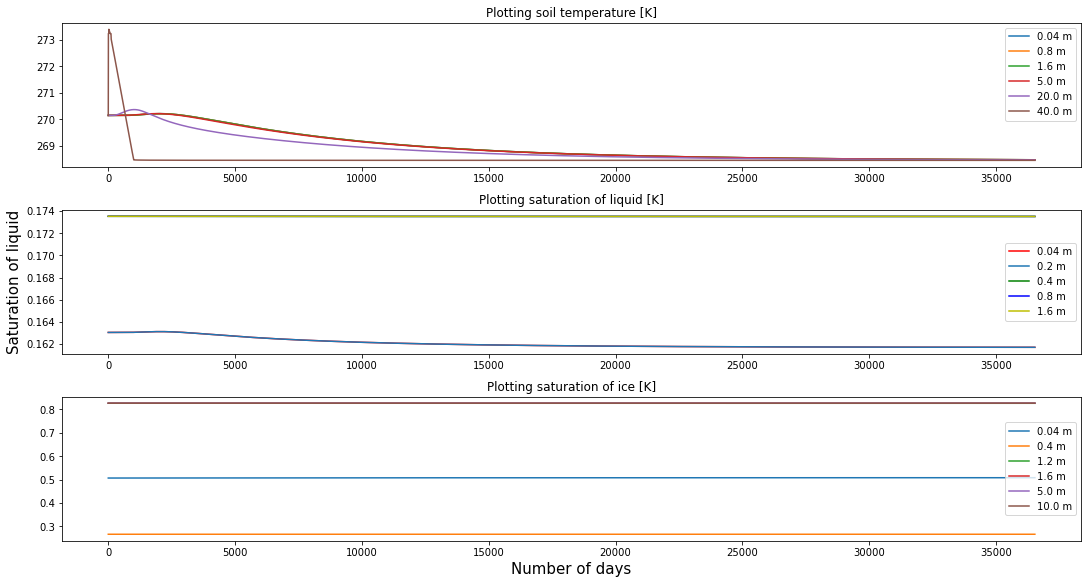

In [82]:
### Plotting the final results (mesured vs simulated) along with the parameters:
### Plotting the temperature for different alpha values at depth 0.01 m
fig2 = plt.figure(figsize=(15,8), constrained_layout=True)
spec2 = gridspec.GridSpec(ncols=1, nrows=3, height_ratios=[1,1,1], figure=fig2)
f2_ax1 = fig2.add_subplot(spec2[0, 0])
f2_ax2 = fig2.add_subplot(spec2[1, 0])
f2_ax3 = fig2.add_subplot(spec2[2, 0])

# Plotting temperature
f2_ax1.set_title('Plotting soil temperature [K]')
#plt.plot(df_observation['point -0.01 temperature [K]'][:1000],label='0.01 m')
f2_ax1.plot(df_observation['point -0.04 temperature [K]'],label='0.04 m')
#f2_ax1.plot(df_observation['point -0.2 temperature [K]'],label='0.2 m')
#f2_ax1.plot(df_observation['point -0.4 temperature [K]'],label='0.4 m')
f2_ax1.plot(df_observation['point -0.8 temperature [K]'],label='0.8 m')
#f2_ax1.plot(df_observation['point -1.2 temperature [K]'],label='1.2 m')
f2_ax1.plot(df_observation['point -1.6 temperature [K]'],label='1.6 m')
f2_ax1.plot(df_observation['point -5.0 temperature [K]'],label='5.0 m')
#f2_ax1.plot(df_observation['point -10.0 temperature [K]'],label='10.0 m')
f2_ax1.plot(df_observation['point -20.0 temperature [K]'],label='20.0 m')
f2_ax1.plot(df_observation['point -40.0 temperature [K]'],label='40.0 m')
f2_ax1.legend()

# Plotting saturation of liquid
f2_ax2.set_title('Plotting saturation of liquid [K]')
#plt.plot(df_observation['point -0.01 temperature [K]'][:1000],label='0.01 m')
f2_ax2.plot(df_observation['point -0.04 saturation liquid'],'r',label='0.04 m')
f2_ax2.plot(df_observation['point -0.2 saturation liquid'],label='0.2 m')
f2_ax2.plot(df_observation['point -0.4 saturation liquid'],'g',label='0.4 m')
f2_ax2.plot(df_observation['point -0.8 saturation liquid'],'b',label='0.8 m')
f2_ax2.plot(df_observation['point -1.6 saturation liquid'],'y',label='1.6 m')
#f2_ax2.plot(df_obs_AWS['point -0.04 saturation liquid'],'r--',label='s - 0.04 m')
#f2_ax2.plot(df_obs_AWS['point -0.4 saturation liquid'],'g--',label='s - 0.4 m')
#f2_ax2.plot(df_obs_AWS['point -0.8 saturation liquid'],'b--',label='s - 0.8 m')
#f2_ax2.plot(df_obs_AWS['point -1.6 saturation liquid'],'y--',label='s - 1.6 m')
f2_ax2.legend()
f2_ax2.set_ylabel('Saturation of liquid',fontsize=15)

# Plotting saturation of ice
f2_ax3.set_title('Plotting saturation of ice [K]')
#plt.plot(df_observation['point -0.01 temperature [K]'][:1000],label='0.01 m')
f2_ax3.plot(df_observation['point -0.04 saturation ice'],label='0.04 m')
#f2_ax3.plot(df_observation['point -0.2 saturation ice'],label='0.2 m')
f2_ax3.plot(df_observation['point -0.4 saturation ice'],label='0.4 m')
#f2_ax3.plot(df_observation['point -0.8 saturation ice'],label='0.8 m')
f2_ax3.plot(df_observation['point -1.2 saturation ice'],label='1.2 m')
f2_ax3.plot(df_observation['point -1.6 saturation ice'],label='1.6 m')
f2_ax3.plot(df_observation['point -5.0 saturation ice'],label='5.0 m')
f2_ax3.plot(df_observation['point -10.0 saturation ice'],label='10.0 m')
f2_ax3.set_xlabel('Number of days',fontsize=15)
f2_ax3.legend()


In [14]:
# Reading the csv file 
#/home/rk/ats_rk/testing/ats-demos/rk_model/Spinup_final_10032022/Case1_B_cv_spinup_II_final.demo
df_observation = pd.read_csv('Case1_B_cv_spinup_II_final.demo/observations.dat', skiprows=304, sep=' ')
df_observation['time [days]'] = df_observation['time [s]']/86400
df_observation.index = df_observation['time [days]']

df_observation.head()

,time [s],point -0.04 temperature [K],point -0.1 temperature [K],point -0.2 temperature [K],point -0.4 temperature [K],point -0.8 temperature [K],point -1.2 temperature [K],point -1.6 temperature [K],point -5.0 temperature [K],point -10.0 temperature [K],...,point -0.4 saturation gas,point -0.8 saturation gas,point -1.2 saturation gas,point -1.6 saturation gas,point -5.0 saturation gas,point -10.0 saturation gas,point -20.0 saturation gas,point -30.0 saturation gas,point -40.0 saturation gas,time [days]
time [days],,,,,,,,,,,,,,,,,,,,,
0.0,0.0,268.470785,268.470784,268.470782,268.470780,268.470772,268.470756,268.470737,268.470404,268.469194,...,0.380012,0.344078,0.286192,0.197672,0.0,0.0,0.0,0.0,0.0,0.0
1.0,86400.0,260.678842,263.597233,265.838356,267.161872,268.245222,268.444643,268.467090,268.470401,268.469192,...,0.380013,0.344078,0.286192,0.197672,0.0,0.0,0.0,0.0,0.0,1.0
2.0,172800.0,259.804456,262.306028,264.495322,266.008449,267.736728,268.310978,268.432186,268.470398,268.469189,...,0.380019,0.344081,0.286193,0.197673,0.0,0.0,0.0,0.0,0.0,2.0
3.0,259200.0,259.477094,261.658053,263.675021,265.172016,267.202772,268.107215,268.361971,268.470394,268.469187,...,0.380024,0.344085,0.286196,0.197675,0.0,0.0,0.0,0.0,0.0,3.0
4.0,345600.0,260.086019,261.731447,263.378387,264.689328,266.738119,267.868642,268.260332,268.470384,268.469184,...,0.380027,0.344090,0.286199,0.197677,0.0,0.0,0.0,0.0,0.0,4.0


In [15]:
len(df_observation)

3651

#### Plotting the values 
##### 1. Subsurface temperature

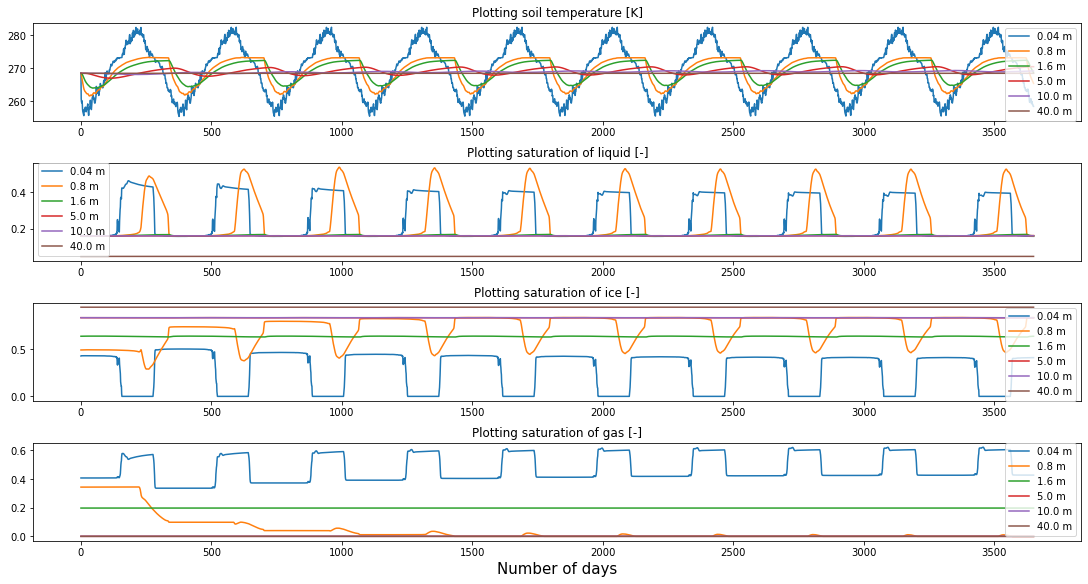

In [28]:
### Plotting the final results (mesured vs simulated) along with the parameters:
### Plotting the temperature for different alpha values at depth 0.01 m
fig2 = plt.figure(figsize=(15,8), constrained_layout=True)
spec2 = gridspec.GridSpec(ncols=1, nrows=4, height_ratios=[1,1,1,1], figure=fig2)
f2_ax1 = fig2.add_subplot(spec2[0, 0])
f2_ax2 = fig2.add_subplot(spec2[1, 0])
f2_ax3 = fig2.add_subplot(spec2[2, 0])
f2_ax4 = fig2.add_subplot(spec2[3, 0])

# Plotting temperature
f2_ax1.set_title('Plotting soil temperature [K]')
#plt.plot(df_observation['point -0.01 temperature [K]'][:1000],label='0.01 m')
f2_ax1.plot(df_observation['point -0.04 temperature [K]'],label='0.04 m')
#f2_ax1.plot(df_observation['point -0.04 temperature [K]'],'r--',label='0.04 m')
#f2_ax1.plot(df_observation['point -0.2 temperature [K]'],label='0.2 m')
#f2_ax1.plot(df_observation['point -0.4 temperature [K]'],label='0.4 m')
f2_ax1.plot(df_observation['point -0.8 temperature [K]'],label='0.8 m')
#f2_ax1.plot(df_observation['point -1.2 temperature [K]'],label='1.2 m')
f2_ax1.plot(df_observation['point -1.6 temperature [K]'],label='1.6 m')
f2_ax1.plot(df_observation['point -5.0 temperature [K]'],label='5.0 m')
f2_ax1.plot(df_observation['point -10.0 temperature [K]'],label='10.0 m')
#f2_ax1.plot(df_observation['point -20.0 temperature [K]'],label='20.0 m')
f2_ax1.plot(df_observation['point -40.0 temperature [K]'],label='40.0 m')
f2_ax1.legend()

# Plotting saturation of liquid
f2_ax2.set_title('Plotting saturation of liquid [-]')
#plt.plot(df_observation['point -0.01 temperature [K]'][:1000],label='0.01 m')
f2_ax2.plot(df_observation['point -0.04 saturation liquid'],label='0.04 m')
#f2_ax2.plot(df_observation['point -0.2 saturation liquid'],label='0.2 m')
#f2_ax2.plot(df_observation['point -0.4 saturation liquid'],label='0.4 m')
f2_ax2.plot(df_observation['point -0.8 saturation liquid'],label='0.8 m')
#f2_ax2.plot(df_observation['point -1.2 saturation liquid'],label='1.2 m')
f2_ax2.plot(df_observation['point -1.6 saturation liquid'],label='1.6 m')
f2_ax2.plot(df_observation['point -5.0 saturation liquid'],label='5.0 m')
f2_ax2.plot(df_observation['point -10.0 saturation liquid'],label='10.0 m')
f2_ax2.plot(df_observation['point -40.0 saturation liquid'],label='40.0 m')
f2_ax2.legend()

# Plotting saturation of ice
f2_ax3.set_title('Plotting saturation of ice [-]')
#plt.plot(df_observation['point -0.01 temperature [K]'][:1000],label='0.01 m')
f2_ax3.plot(df_observation['point -0.04 saturation ice'],label='0.04 m')
#f2_ax3.plot(df_observation['point -0.2 saturation ice'],label='0.2 m')
#f2_ax3.plot(df_observation['point -0.4 saturation ice'],label='0.4 m')
f2_ax3.plot(df_observation['point -0.8 saturation ice'],label='0.8 m')
#f2_ax3.plot(df_observation['point -1.2 saturation ice'],label='1.2 m')
f2_ax3.plot(df_observation['point -1.6 saturation ice'],label='1.6 m')
f2_ax3.plot(df_observation['point -5.0 saturation ice'],label='5.0 m')
f2_ax3.plot(df_observation['point -10.0 saturation ice'],label='10.0 m')
#f2_ax3.plot(df_observation['point -20.0 saturation ice'],label='20.0 m')
f2_ax3.plot(df_observation['point -40.0 saturation ice'],label='40.0 m')
f2_ax3.legend()

# Plotting saturation of gas
f2_ax4.set_title('Plotting saturation of gas [-]')
#plt.plot(df_observation['point -0.01 temperature [K]'][:1000],label='0.01 m')
f2_ax4.plot(df_observation['point -0.04 saturation gas'],label='0.04 m')
#f2_ax4.plot(df_observation['point -0.2 saturation gas'],label='0.2 m')
#f2_ax4.plot(df_observation['point -0.4 saturation gas'],label='0.4 m')
f2_ax4.plot(df_observation['point -0.8 saturation gas'],label='0.8 m')
#f2_ax4.plot(df_observation['point -1.2 saturation gas'],label='1.2 m')
f2_ax4.plot(df_observation['point -1.6 saturation gas'],label='1.6 m')
#f2_ax4.plot(df_observation['point -1.6 saturation gas'],label='1.6 m')
f2_ax4.plot(df_observation['point -5.0 saturation gas'],label='5.0 m')
f2_ax4.plot(df_observation['point -10.0 saturation gas'],label='10.0 m')
f2_ax4.plot(df_observation['point -40.0 saturation gas'],label='40.0 m')
f2_ax4.set_xlabel('Number of days',fontsize=15)
f2_ax4.legend()

Comments: Observe that the saturation of gas reduces and saturation of ice increases at depth 0.8 m

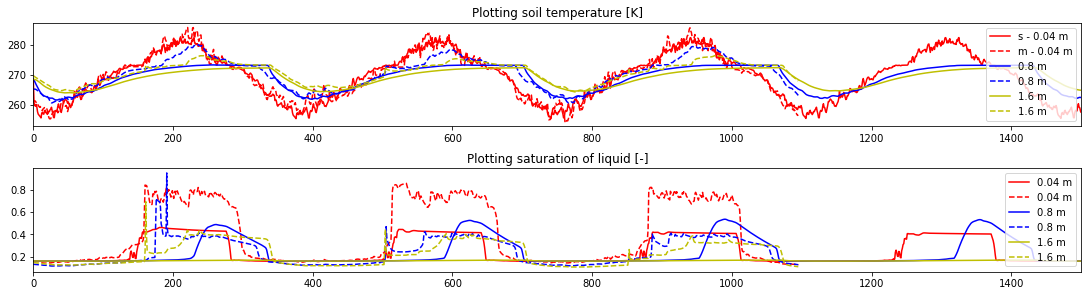

In [67]:
### Plotting the final results (mesured vs simulated) along with the parameters:
### Plotting the temperature for different alpha values at depth 0.01 m
fig2 = plt.figure(figsize=(15,4), constrained_layout=True)
spec2 = gridspec.GridSpec(ncols=1, nrows=2, height_ratios=[1,1], figure=fig2)
f2_ax1 = fig2.add_subplot(spec2[0, 0])
f2_ax2 = fig2.add_subplot(spec2[1, 0])


# Plotting temperature
f2_ax1.set_title('Plotting soil temperature [K]')
#plt.plot(df_observation['point -0.01 temperature [K]'][:1000],label='0.01 m')
f2_ax1.plot(df_observation['point -0.04 temperature [K]'],'r',label='s - 0.04 m')
f2_ax1.plot(df_obs_AWS['point -0.04 temperature [K]'].values,'r--',label='m - 0.04 m')

#f2_ax1.plot(df_observation['point -0.2 temperature [K]'],label='0.2 m')
#f2_ax1.plot(df_observation['point -0.4 temperature [K]'],label='0.4 m')
f2_ax1.plot(df_observation['point -0.8 temperature [K]'],'b',label='0.8 m')
f2_ax1.plot(df_obs_AWS['point -0.8 temperature [K]'].values,'b--',label='0.8 m')
#f2_ax1.plot(df_observation['point -1.2 temperature [K]'],label='1.2 m')
f2_ax1.plot(df_observation['point -1.6 temperature [K]'],'y',label='1.6 m')
f2_ax1.plot(df_obs_AWS['point -1.6 temperature [K]'].values,'y--',label='1.6 m')
f2_ax1.set_xlim(0,1500)
f2_ax1.legend()

# Plotting saturation of liquid
f2_ax2.set_title('Plotting saturation of liquid [-]')
#plt.plot(df_observation['point -0.01 temperature [K]'][:1000],label='0.01 m')
f2_ax2.plot(df_observation['point -0.04 saturation liquid'],'r',label='0.04 m')
f2_ax2.plot(df_obs_AWS['point -0.04 saturation liquid'].values,'r--',label='0.04 m')

#f2_ax1.plot(df_observation['point -0.2 temperature [K]'],label='0.2 m')
#f2_ax1.plot(df_observation['point -0.4 temperature [K]'],label='0.4 m')
f2_ax2.plot(df_observation['point -0.8 saturation liquid'],'b',label='0.8 m')
f2_ax2.plot(df_obs_AWS['point -0.8 saturation liquid'].values,'b--',label='0.8 m')
#f2_ax1.plot(df_observation['point -1.2 temperature [K]'],label='1.2 m')
f2_ax2.plot(df_observation['point -1.6 saturation liquid'],'y',label='1.6 m')
f2_ax2.plot(df_obs_AWS['point -1.6 saturation liquid'].values,'y--',label='1.6 m')
f2_ax2.set_xlim(0,1500)
f2_ax2.legend()

Clearly the temperature at the lower depths has been underestimated! - Due to initial conditions from spinup? Is there sufficient water in the column? Lower the initial temperature? 

##### How to determine the optimum time period for simulation? - Visually it seems to have reached a steady state! How can we quantitatively prove that?
- Find the difference between the simulated values of the present year with the next year.
- Plot these values and check when the values become constant!

In [53]:
df_eqn_check = df_observation.iloc[1:,:].copy()

no_itr = 9

all_columns = df_eqn_check.columns

#for i, cols in enumerate(all_columns):
for i in np.arange(0,9,1):
    for j in np.arange(365):
        df_eqn_check.iloc[j+i*365,:] = df_observation.iloc[j+i*365,:] - df_observation.iloc[j+i*365+365,:]
        #print(j+i*365)
    #df_eqn_check.iloc[]
    #print(cols)
df_eqn_check.head()   

,time [s],point -0.04 temperature [K],point -0.1 temperature [K],point -0.2 temperature [K],point -0.4 temperature [K],point -0.8 temperature [K],point -1.2 temperature [K],point -1.6 temperature [K],point -5.0 temperature [K],point -10.0 temperature [K],...,point -0.4 saturation gas,point -0.8 saturation gas,point -1.2 saturation gas,point -1.6 saturation gas,point -5.0 saturation gas,point -10.0 saturation gas,point -20.0 saturation gas,point -30.0 saturation gas,point -40.0 saturation gas,time [days]
time [days],,,,,,,,,,,,,,,,,,,,,
1.0,-31536000.0,9.392653,8.309666,6.849299,5.678300,3.583421,1.708322,0.375397,-1.524269,-0.070642,...,-0.088516,0.245490,-0.000027,-0.000009,0.0,0.0,0.0,0.0,0.0,-365.0
2.0,-31536000.0,1.232075,3.154987,4.078977,4.339741,3.457714,1.820421,0.507883,-1.516579,-0.074838,...,-0.088516,0.245489,-0.000030,-0.000013,0.0,0.0,0.0,0.0,0.0,-365.0
3.0,-31536000.0,0.764025,2.078344,2.840955,3.256297,3.045044,1.813461,0.602903,-1.507821,-0.079032,...,-0.088509,0.245490,-0.000031,-0.000016,0.0,0.0,0.0,0.0,0.0,-365.0
4.0,-31536000.0,0.570428,1.563713,2.132024,2.516711,2.612002,1.729661,0.656924,-1.498007,-0.083222,...,-0.088502,0.245493,-0.000031,-0.000018,0.0,0.0,0.0,0.0,0.0,-365.0
5.0,-31536000.0,0.435801,1.211254,1.659911,1.994192,2.220557,1.601071,0.673478,-1.487154,-0.087407,...,-0.088500,0.245496,-0.000030,-0.000019,0.0,0.0,0.0,0.0,0.0,-365.0


In [58]:
df_eqn_check = df_eqn_check.iloc[:3285]

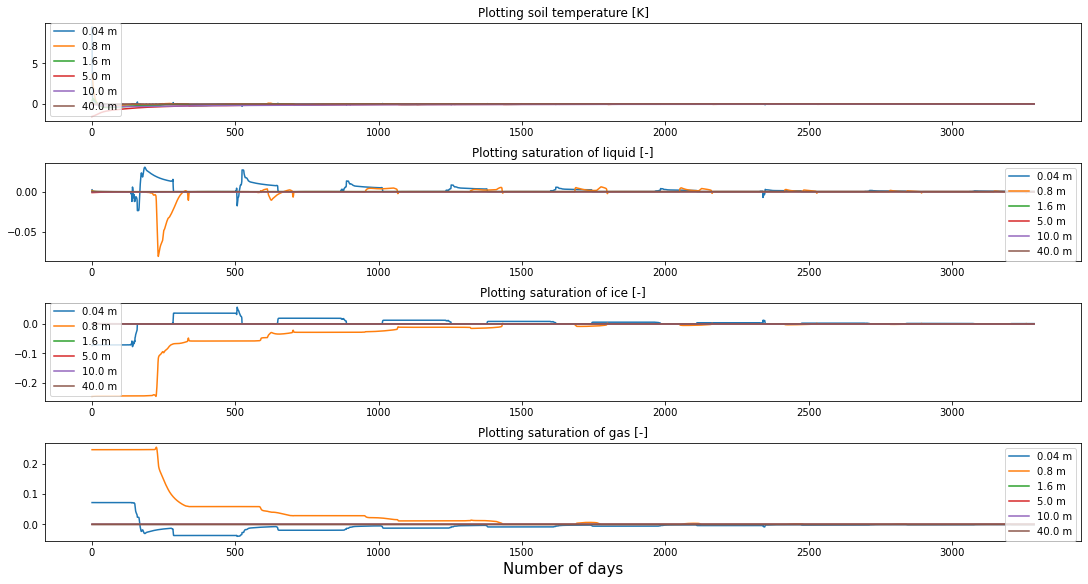

In [59]:
### Plotting the final results (mesured vs simulated) along with the parameters:
### Plotting the temperature for different alpha values at depth 0.01 m
fig2 = plt.figure(figsize=(15,8), constrained_layout=True)
spec2 = gridspec.GridSpec(ncols=1, nrows=4, height_ratios=[1,1,1,1], figure=fig2)
f2_ax1 = fig2.add_subplot(spec2[0, 0])
f2_ax2 = fig2.add_subplot(spec2[1, 0])
f2_ax3 = fig2.add_subplot(spec2[2, 0])
f2_ax4 = fig2.add_subplot(spec2[3, 0])

# Plotting temperature
f2_ax1.set_title('Plotting soil temperature [K]')
#plt.plot(df_observation['point -0.01 temperature [K]'][:1000],label='0.01 m')
f2_ax1.plot(df_eqn_check['point -0.04 temperature [K]'],label='0.04 m')
#f2_ax1.plot(df_observation['point -0.04 temperature [K]'],'r--',label='0.04 m')
#f2_ax1.plot(df_observation['point -0.2 temperature [K]'],label='0.2 m')
#f2_ax1.plot(df_observation['point -0.4 temperature [K]'],label='0.4 m')
f2_ax1.plot(df_eqn_check['point -0.8 temperature [K]'],label='0.8 m')
#f2_ax1.plot(df_observation['point -1.2 temperature [K]'],label='1.2 m')
f2_ax1.plot(df_eqn_check['point -1.6 temperature [K]'],label='1.6 m')
f2_ax1.plot(df_eqn_check['point -5.0 temperature [K]'],label='5.0 m')
f2_ax1.plot(df_eqn_check['point -10.0 temperature [K]'],label='10.0 m')
#f2_ax1.plot(df_observation['point -20.0 temperature [K]'],label='20.0 m')
f2_ax1.plot(df_eqn_check['point -40.0 temperature [K]'],label='40.0 m')
f2_ax1.legend()

# Plotting saturation of liquid
f2_ax2.set_title('Plotting saturation of liquid [-]')
#plt.plot(df_observation['point -0.01 temperature [K]'][:1000],label='0.01 m')
f2_ax2.plot(df_eqn_check['point -0.04 saturation liquid'],label='0.04 m')
#f2_ax2.plot(df_observation['point -0.2 saturation liquid'],label='0.2 m')
#f2_ax2.plot(df_observation['point -0.4 saturation liquid'],label='0.4 m')
f2_ax2.plot(df_eqn_check['point -0.8 saturation liquid'],label='0.8 m')
#f2_ax2.plot(df_observation['point -1.2 saturation liquid'],label='1.2 m')
f2_ax2.plot(df_eqn_check['point -1.6 saturation liquid'],label='1.6 m')
f2_ax2.plot(df_eqn_check['point -5.0 saturation liquid'],label='5.0 m')
f2_ax2.plot(df_eqn_check['point -10.0 saturation liquid'],label='10.0 m')
f2_ax2.plot(df_eqn_check['point -40.0 saturation liquid'],label='40.0 m')
f2_ax2.legend()

# Plotting saturation of ice
f2_ax3.set_title('Plotting saturation of ice [-]')
#plt.plot(df_observation['point -0.01 temperature [K]'][:1000],label='0.01 m')
f2_ax3.plot(df_eqn_check['point -0.04 saturation ice'],label='0.04 m')
#f2_ax3.plot(df_observation['point -0.2 saturation ice'],label='0.2 m')
#f2_ax3.plot(df_observation['point -0.4 saturation ice'],label='0.4 m')
f2_ax3.plot(df_eqn_check['point -0.8 saturation ice'],label='0.8 m')
#f2_ax3.plot(df_observation['point -1.2 saturation ice'],label='1.2 m')
f2_ax3.plot(df_eqn_check['point -1.6 saturation ice'],label='1.6 m')
f2_ax3.plot(df_eqn_check['point -5.0 saturation ice'],label='5.0 m')
f2_ax3.plot(df_eqn_check['point -10.0 saturation ice'],label='10.0 m')
#f2_ax3.plot(df_observation['point -20.0 saturation ice'],label='20.0 m')
f2_ax3.plot(df_eqn_check['point -40.0 saturation ice'],label='40.0 m')
f2_ax3.legend()

# Plotting saturation of gas
f2_ax4.set_title('Plotting saturation of gas [-]')
#plt.plot(df_observation['point -0.01 temperature [K]'][:1000],label='0.01 m')
f2_ax4.plot(df_eqn_check['point -0.04 saturation gas'],label='0.04 m')
#f2_ax4.plot(df_observation['point -0.2 saturation gas'],label='0.2 m')
#f2_ax4.plot(df_observation['point -0.4 saturation gas'],label='0.4 m')
f2_ax4.plot(df_eqn_check['point -0.8 saturation gas'],label='0.8 m')
#f2_ax4.plot(df_observation['point -1.2 saturation gas'],label='1.2 m')
f2_ax4.plot(df_eqn_check['point -1.6 saturation gas'],label='1.6 m')
#f2_ax4.plot(df_observation['point -1.6 saturation gas'],label='1.6 m')
f2_ax4.plot(df_eqn_check['point -5.0 saturation gas'],label='5.0 m')
f2_ax4.plot(df_eqn_check['point -10.0 saturation gas'],label='10.0 m')
f2_ax4.plot(df_eqn_check['point -40.0 saturation gas'],label='40.0 m')
f2_ax4.set_xlabel('Number of days',fontsize=15)
f2_ax4.legend()

### Case III

#### Test case - 1 year - Case5_I_E_glm

In [84]:
# Reading the csv file 
#/home/rk/ats_rk/testing/ats-demos/rk_model/Spinup_final_10032022/Case1_B_cv_spinup_II_final.demo
df_observation = pd.read_csv('Case5_I_E_glm.demo/observations.dat', skiprows=346, sep=' ')
df_observation['time [days]'] = df_observation['time [s]']/86400
df_observation.index = df_observation['time [days]']

df_observation.head()

,time [s],water content [mol],surface water content [mol],snow water equivalent [mol],evaporation rate [m s^-1],discharge [mol s^-1],surface-subsurface flux [mol s^-1],precipitation rain [m s^-1],precipitation snow [m s^-1],snow melt [m s^-1],...,point -0.4 saturation gas,point -0.8 saturation gas,point -1.2 saturation gas,point -1.6 saturation gas,point -5.0 saturation gas,point -10.0 saturation gas,point -20.0 saturation gas,point -30.0 saturation gas,point -40.0 saturation gas,time [days]
time [days],,,,,,,,,,,,,,,,,,,,,
0.0,0.0,717471.281270,0.0,0.0,1.269009e-08,0.0,0.0,0.0,0.0,0.0,...,0.380012,0.344078,0.286192,0.197672,0.0,0.0,0.0,0.0,0.0,0.0
1.0,86400.0,717442.999865,0.0,0.0,5.579533e-09,0.0,0.0,0.0,0.0,0.0,...,0.380011,0.344078,0.286192,0.197672,0.0,0.0,0.0,0.0,0.0,1.0
2.0,172800.0,717426.425463,0.0,0.0,3.464673e-09,0.0,0.0,0.0,0.0,0.0,...,0.380015,0.344080,0.286193,0.197673,0.0,0.0,0.0,0.0,0.0,2.0
3.0,259200.0,717409.904969,0.0,0.0,3.453959e-09,0.0,0.0,0.0,0.0,0.0,...,0.380019,0.344082,0.286194,0.197674,0.0,0.0,0.0,0.0,0.0,3.0
4.0,345600.0,717389.805781,0.0,0.0,4.200065e-09,0.0,0.0,0.0,0.0,0.0,...,0.380022,0.344085,0.286197,0.197676,0.0,0.0,0.0,0.0,0.0,4.0


In [85]:
len(df_observation)

366

#### Plotting the values 
##### 1. Subsurface temperature

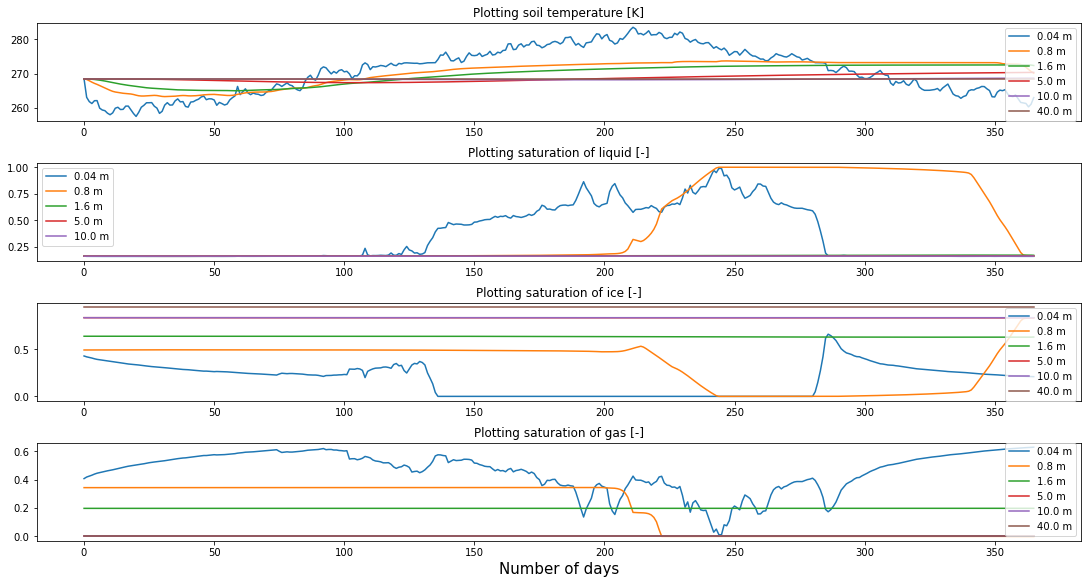

In [87]:
### Plotting the final results (mesured vs simulated) along with the parameters:
### Plotting the temperature for different alpha values at depth 0.01 m
fig2 = plt.figure(figsize=(15,8), constrained_layout=True)
spec2 = gridspec.GridSpec(ncols=1, nrows=4, height_ratios=[1,1,1,1], figure=fig2)
f2_ax1 = fig2.add_subplot(spec2[0, 0])
f2_ax2 = fig2.add_subplot(spec2[1, 0])
f2_ax3 = fig2.add_subplot(spec2[2, 0])
f2_ax4 = fig2.add_subplot(spec2[3, 0])

# Plotting temperature
f2_ax1.set_title('Plotting soil temperature [K]')
#plt.plot(df_observation['point -0.01 temperature [K]'][:1000],label='0.01 m')
f2_ax1.plot(df_observation['point -0.04 temperature [K]'],label='0.04 m')
#f2_ax1.plot(df_observation['point -0.04 temperature [K]'],'r--',label='0.04 m')
#f2_ax1.plot(df_observation['point -0.2 temperature [K]'],label='0.2 m')
#f2_ax1.plot(df_observation['point -0.4 temperature [K]'],label='0.4 m')
f2_ax1.plot(df_observation['point -0.8 temperature [K]'],label='0.8 m')
#f2_ax1.plot(df_observation['point -1.2 temperature [K]'],label='1.2 m')
f2_ax1.plot(df_observation['point -1.6 temperature [K]'],label='1.6 m')
f2_ax1.plot(df_observation['point -5.0 temperature [K]'],label='5.0 m')
f2_ax1.plot(df_observation['point -10.0 temperature [K]'],label='10.0 m')
#f2_ax1.plot(df_observation['point -20.0 temperature [K]'],label='20.0 m')
f2_ax1.plot(df_observation['point -40.0 temperature [K]'],label='40.0 m')
f2_ax1.legend()

# Plotting saturation of liquid
f2_ax2.set_title('Plotting saturation of liquid [-]')
#plt.plot(df_observation['point -0.01 temperature [K]'][:1000],label='0.01 m')
f2_ax2.plot(df_observation['point -0.04 saturation liquid'],label='0.04 m')
#f2_ax2.plot(df_observation['point -0.2 saturation liquid'],label='0.2 m')
#f2_ax2.plot(df_observation['point -0.4 saturation liquid'],label='0.4 m')
f2_ax2.plot(df_observation['point -0.8 saturation liquid'],label='0.8 m')
#f2_ax2.plot(df_observation['point -1.2 saturation liquid'],label='1.2 m')
f2_ax2.plot(df_observation['point -1.6 saturation liquid'],label='1.6 m')
f2_ax2.plot(df_observation['point -5.0 saturation liquid'],label='5.0 m')
f2_ax2.plot(df_observation['point -10.0 saturation liquid'],label='10.0 m')
#f2_ax2.plot(df_observation['point -40.0 saturation liquid'],label='40.0 m')
f2_ax2.legend()

# Plotting saturation of ice
f2_ax3.set_title('Plotting saturation of ice [-]')
#plt.plot(df_observation['point -0.01 temperature [K]'][:1000],label='0.01 m')
f2_ax3.plot(df_observation['point -0.04 saturation ice'],label='0.04 m')
#f2_ax3.plot(df_observation['point -0.2 saturation ice'],label='0.2 m')
#f2_ax3.plot(df_observation['point -0.4 saturation ice'],label='0.4 m')
f2_ax3.plot(df_observation['point -0.8 saturation ice'],label='0.8 m')
#f2_ax3.plot(df_observation['point -1.2 saturation ice'],label='1.2 m')
f2_ax3.plot(df_observation['point -1.6 saturation ice'],label='1.6 m')
f2_ax3.plot(df_observation['point -5.0 saturation ice'],label='5.0 m')
f2_ax3.plot(df_observation['point -10.0 saturation ice'],label='10.0 m')
#f2_ax3.plot(df_observation['point -20.0 saturation ice'],label='20.0 m')
f2_ax3.plot(df_observation['point -40.0 saturation ice'],label='40.0 m')
f2_ax3.legend()

# Plotting saturation of gas
f2_ax4.set_title('Plotting saturation of gas [-]')
#plt.plot(df_observation['point -0.01 temperature [K]'][:1000],label='0.01 m')
f2_ax4.plot(df_observation['point -0.04 saturation gas'],label='0.04 m')
#f2_ax4.plot(df_observation['point -0.2 saturation gas'],label='0.2 m')
#f2_ax4.plot(df_observation['point -0.4 saturation gas'],label='0.4 m')
f2_ax4.plot(df_observation['point -0.8 saturation gas'],label='0.8 m')
#f2_ax4.plot(df_observation['point -1.2 saturation gas'],label='1.2 m')
f2_ax4.plot(df_observation['point -1.6 saturation gas'],label='1.6 m')
#f2_ax4.plot(df_observation['point -1.6 saturation gas'],label='1.6 m')
f2_ax4.plot(df_observation['point -5.0 saturation gas'],label='5.0 m')
f2_ax4.plot(df_observation['point -10.0 saturation gas'],label='10.0 m')
f2_ax4.plot(df_observation['point -40.0 saturation gas'],label='40.0 m')
f2_ax4.set_xlabel('Number of days',fontsize=15)
f2_ax4.legend()

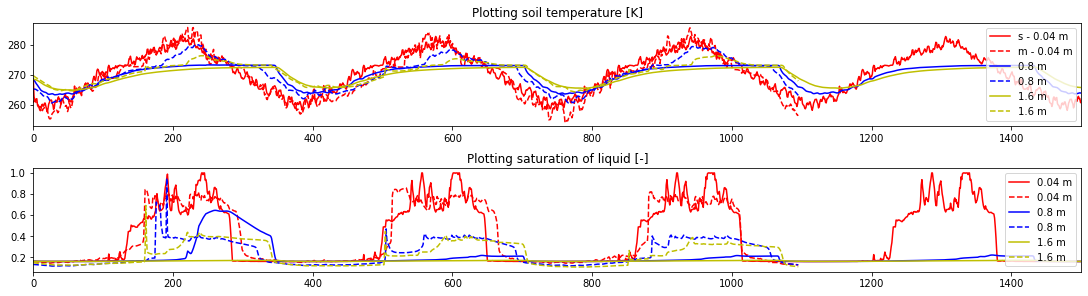

In [97]:
### Plotting the final results (mesured vs simulated) along with the parameters:
### Plotting the temperature for different alpha values at depth 0.01 m
fig2 = plt.figure(figsize=(15,4), constrained_layout=True)
spec2 = gridspec.GridSpec(ncols=1, nrows=2, height_ratios=[1,1], figure=fig2)
f2_ax1 = fig2.add_subplot(spec2[0, 0])
f2_ax2 = fig2.add_subplot(spec2[1, 0])


# Plotting temperature
f2_ax1.set_title('Plotting soil temperature [K]')
#plt.plot(df_observation['point -0.01 temperature [K]'][:1000],label='0.01 m')
f2_ax1.plot(df_observation['point -0.04 temperature [K]'],'r',label='s - 0.04 m')
f2_ax1.plot(df_obs_AWS['point -0.04 temperature [K]'].values,'r--',label='m - 0.04 m')

#f2_ax1.plot(df_observation['point -0.2 temperature [K]'],label='0.2 m')
#f2_ax1.plot(df_observation['point -0.4 temperature [K]'],label='0.4 m')
f2_ax1.plot(df_observation['point -0.8 temperature [K]'],'b',label='0.8 m')
f2_ax1.plot(df_obs_AWS['point -0.8 temperature [K]'].values,'b--',label='0.8 m')
#f2_ax1.plot(df_observation['point -1.2 temperature [K]'],label='1.2 m')
f2_ax1.plot(df_observation['point -1.6 temperature [K]'],'y',label='1.6 m')
f2_ax1.plot(df_obs_AWS['point -1.6 temperature [K]'].values,'y--',label='1.6 m')
f2_ax1.set_xlim(0,1500)
f2_ax1.legend()

# Plotting saturation of liquid
f2_ax2.set_title('Plotting saturation of liquid [-]')
#plt.plot(df_observation['point -0.01 temperature [K]'][:1000],label='0.01 m')
f2_ax2.plot(df_observation['point -0.04 saturation liquid'],'r',label='0.04 m')
f2_ax2.plot(df_obs_AWS['point -0.04 saturation liquid'].values,'r--',label='0.04 m')

#f2_ax1.plot(df_observation['point -0.2 temperature [K]'],label='0.2 m')
#f2_ax1.plot(df_observation['point -0.4 temperature [K]'],label='0.4 m')
f2_ax2.plot(df_observation['point -0.8 saturation liquid'],'b',label='0.8 m')
f2_ax2.plot(df_obs_AWS['point -0.8 saturation liquid'].values,'b--',label='0.8 m')
#f2_ax1.plot(df_observation['point -1.2 temperature [K]'],label='1.2 m')
f2_ax2.plot(df_observation['point -1.6 saturation liquid'],'y',label='1.6 m')
f2_ax2.plot(df_obs_AWS['point -1.6 saturation liquid'].values,'y--',label='1.6 m')
f2_ax2.set_xlim(0,1500)
f2_ax2.legend()

In [114]:
# Reading the csv file 
#/home/rk/ats_rk/testing/ats-demos/rk_model/Spinup_final_10032022/Case1_B_cv_spinup_II_final.demo
df_observation = pd.read_csv('Case5_I_E_cv_spinup_III_HD11.demo/observations.dat', skiprows=346, sep=' ')
df_observation['time [days]'] = df_observation['time [s]']/86400
df_observation.index = df_observation['time [days]']

df_observation.head()

,time [s],water content [mol],surface water content [mol],snow water equivalent [mol],evaporation rate [m s^-1],discharge [mol s^-1],surface-subsurface flux [mol s^-1],precipitation rain [m s^-1],precipitation snow [m s^-1],snow melt [m s^-1],...,point -0.4 saturation gas,point -0.8 saturation gas,point -1.2 saturation gas,point -1.6 saturation gas,point -5.0 saturation gas,point -10.0 saturation gas,point -20.0 saturation gas,point -30.0 saturation gas,point -40.0 saturation gas,time [days]
time [days],,,,,,,,,,,,,,,,,,,,,
0.0,0.0,724674.944549,0.0,0.0,3.237313e-08,0.0,0.0,0.0,0.0,0.0,...,0.277550,0.179966,0.000988,0.000471,0.0,0.0,0.0,0.0,0.0,0.0
1.0,86400.0,724616.316478,0.0,0.0,1.108659e-08,0.0,0.0,0.0,0.0,0.0,...,0.277566,0.179970,0.000989,0.000471,0.0,0.0,0.0,0.0,0.0,1.0
2.0,172800.0,724585.270099,0.0,0.0,6.490247e-09,0.0,0.0,0.0,0.0,0.0,...,0.277585,0.179982,0.000995,0.000473,0.0,0.0,0.0,0.0,0.0,2.0
3.0,259200.0,724555.805624,0.0,0.0,6.160506e-09,0.0,0.0,0.0,0.0,0.0,...,0.277601,0.179996,0.001004,0.000476,0.0,0.0,0.0,0.0,0.0,3.0
4.0,345600.0,724522.056146,0.0,0.0,7.052894e-09,0.0,0.0,0.0,0.0,0.0,...,0.277609,0.180009,0.001015,0.000481,0.0,0.0,0.0,0.0,0.0,4.0


In [115]:
len(df_observation)

3651

#### Plotting the values 
##### 1. Subsurface temperature

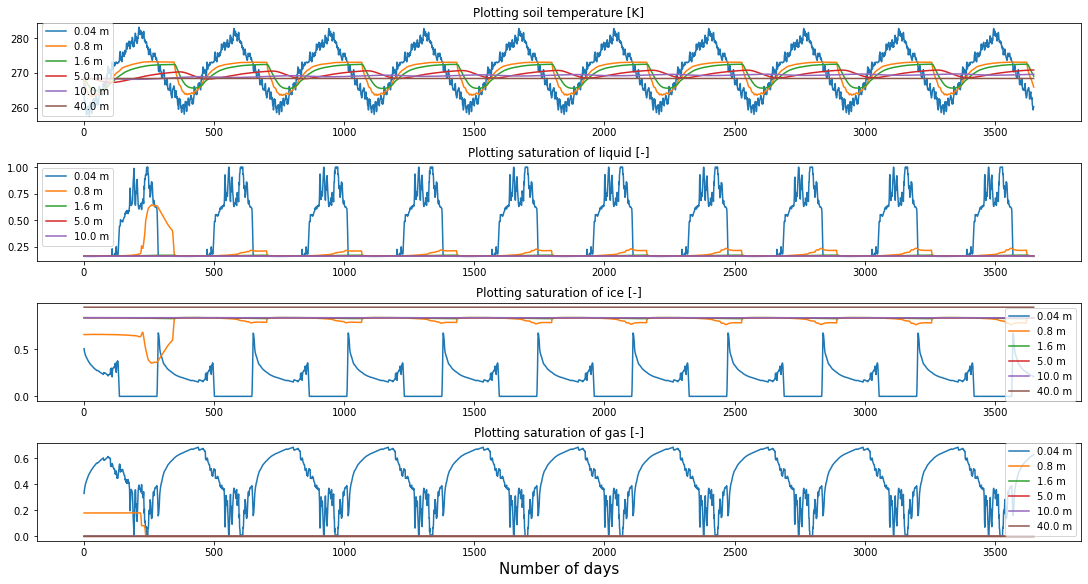

In [116]:
### Plotting the final results (mesured vs simulated) along with the parameters:
### Plotting the temperature for different alpha values at depth 0.01 m
fig2 = plt.figure(figsize=(15,8), constrained_layout=True)
spec2 = gridspec.GridSpec(ncols=1, nrows=4, height_ratios=[1,1,1,1], figure=fig2)
f2_ax1 = fig2.add_subplot(spec2[0, 0])
f2_ax2 = fig2.add_subplot(spec2[1, 0])
f2_ax3 = fig2.add_subplot(spec2[2, 0])
f2_ax4 = fig2.add_subplot(spec2[3, 0])

# Plotting temperature
f2_ax1.set_title('Plotting soil temperature [K]')
#plt.plot(df_observation['point -0.01 temperature [K]'][:1000],label='0.01 m')
f2_ax1.plot(df_observation['point -0.04 temperature [K]'],label='0.04 m')
#f2_ax1.plot(df_observation['point -0.04 temperature [K]'],'r--',label='0.04 m')
#f2_ax1.plot(df_observation['point -0.2 temperature [K]'],label='0.2 m')
#f2_ax1.plot(df_observation['point -0.4 temperature [K]'],label='0.4 m')
f2_ax1.plot(df_observation['point -0.8 temperature [K]'],label='0.8 m')
#f2_ax1.plot(df_observation['point -1.2 temperature [K]'],label='1.2 m')
f2_ax1.plot(df_observation['point -1.6 temperature [K]'],label='1.6 m')
f2_ax1.plot(df_observation['point -5.0 temperature [K]'],label='5.0 m')
f2_ax1.plot(df_observation['point -10.0 temperature [K]'],label='10.0 m')
#f2_ax1.plot(df_observation['point -20.0 temperature [K]'],label='20.0 m')
f2_ax1.plot(df_observation['point -40.0 temperature [K]'],label='40.0 m')
f2_ax1.legend()

# Plotting saturation of liquid
f2_ax2.set_title('Plotting saturation of liquid [-]')
#plt.plot(df_observation['point -0.01 temperature [K]'][:1000],label='0.01 m')
f2_ax2.plot(df_observation['point -0.04 saturation liquid'],label='0.04 m')
#f2_ax2.plot(df_observation['point -0.2 saturation liquid'],label='0.2 m')
#f2_ax2.plot(df_observation['point -0.4 saturation liquid'],label='0.4 m')
f2_ax2.plot(df_observation['point -0.8 saturation liquid'],label='0.8 m')
#f2_ax2.plot(df_observation['point -1.2 saturation liquid'],label='1.2 m')
f2_ax2.plot(df_observation['point -1.6 saturation liquid'],label='1.6 m')
f2_ax2.plot(df_observation['point -5.0 saturation liquid'],label='5.0 m')
f2_ax2.plot(df_observation['point -10.0 saturation liquid'],label='10.0 m')
#f2_ax2.plot(df_observation['point -40.0 saturation liquid'],label='40.0 m')
f2_ax2.legend()

# Plotting saturation of ice
f2_ax3.set_title('Plotting saturation of ice [-]')
#plt.plot(df_observation['point -0.01 temperature [K]'][:1000],label='0.01 m')
f2_ax3.plot(df_observation['point -0.04 saturation ice'],label='0.04 m')
#f2_ax3.plot(df_observation['point -0.2 saturation ice'],label='0.2 m')
#f2_ax3.plot(df_observation['point -0.4 saturation ice'],label='0.4 m')
f2_ax3.plot(df_observation['point -0.8 saturation ice'],label='0.8 m')
#f2_ax3.plot(df_observation['point -1.2 saturation ice'],label='1.2 m')
f2_ax3.plot(df_observation['point -1.6 saturation ice'],label='1.6 m')
f2_ax3.plot(df_observation['point -5.0 saturation ice'],label='5.0 m')
f2_ax3.plot(df_observation['point -10.0 saturation ice'],label='10.0 m')
#f2_ax3.plot(df_observation['point -20.0 saturation ice'],label='20.0 m')
f2_ax3.plot(df_observation['point -40.0 saturation ice'],label='40.0 m')
f2_ax3.legend()

# Plotting saturation of gas
f2_ax4.set_title('Plotting saturation of gas [-]')
#plt.plot(df_observation['point -0.01 temperature [K]'][:1000],label='0.01 m')
f2_ax4.plot(df_observation['point -0.04 saturation gas'],label='0.04 m')
#f2_ax4.plot(df_observation['point -0.2 saturation gas'],label='0.2 m')
#f2_ax4.plot(df_observation['point -0.4 saturation gas'],label='0.4 m')
f2_ax4.plot(df_observation['point -0.8 saturation gas'],label='0.8 m')
#f2_ax4.plot(df_observation['point -1.2 saturation gas'],label='1.2 m')
f2_ax4.plot(df_observation['point -1.6 saturation gas'],label='1.6 m')
#f2_ax4.plot(df_observation['point -1.6 saturation gas'],label='1.6 m')
f2_ax4.plot(df_observation['point -5.0 saturation gas'],label='5.0 m')
f2_ax4.plot(df_observation['point -10.0 saturation gas'],label='10.0 m')
f2_ax4.plot(df_observation['point -40.0 saturation gas'],label='40.0 m')
f2_ax4.set_xlabel('Number of days',fontsize=15)
f2_ax4.legend()

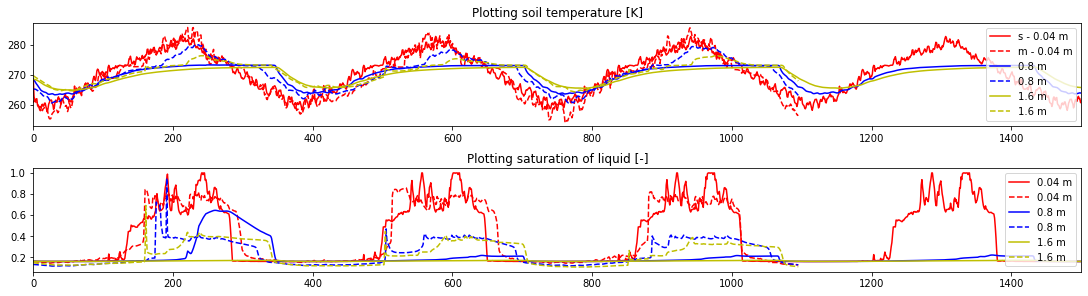

In [117]:
### Plotting the final results (mesured vs simulated) along with the parameters:
### Plotting the temperature for different alpha values at depth 0.01 m
fig2 = plt.figure(figsize=(15,4), constrained_layout=True)
spec2 = gridspec.GridSpec(ncols=1, nrows=2, height_ratios=[1,1], figure=fig2)
f2_ax1 = fig2.add_subplot(spec2[0, 0])
f2_ax2 = fig2.add_subplot(spec2[1, 0])


# Plotting temperature
f2_ax1.set_title('Plotting soil temperature [K]')
#plt.plot(df_observation['point -0.01 temperature [K]'][:1000],label='0.01 m')
f2_ax1.plot(df_observation['point -0.04 temperature [K]'],'r',label='s - 0.04 m')
f2_ax1.plot(df_obs_AWS['point -0.04 temperature [K]'].values,'r--',label='m - 0.04 m')

#f2_ax1.plot(df_observation['point -0.2 temperature [K]'],label='0.2 m')
#f2_ax1.plot(df_observation['point -0.4 temperature [K]'],label='0.4 m')
f2_ax1.plot(df_observation['point -0.8 temperature [K]'],'b',label='0.8 m')
f2_ax1.plot(df_obs_AWS['point -0.8 temperature [K]'].values,'b--',label='0.8 m')
#f2_ax1.plot(df_observation['point -1.2 temperature [K]'],label='1.2 m')
f2_ax1.plot(df_observation['point -1.6 temperature [K]'],'y',label='1.6 m')
f2_ax1.plot(df_obs_AWS['point -1.6 temperature [K]'].values,'y--',label='1.6 m')
f2_ax1.set_xlim(0,1500)
f2_ax1.legend()

# Plotting saturation of liquid
f2_ax2.set_title('Plotting saturation of liquid [-]')
#plt.plot(df_observation['point -0.01 temperature [K]'][:1000],label='0.01 m')
f2_ax2.plot(df_observation['point -0.04 saturation liquid'],'r',label='0.04 m')
f2_ax2.plot(df_obs_AWS['point -0.04 saturation liquid'].values,'r--',label='0.04 m')

#f2_ax1.plot(df_observation['point -0.2 temperature [K]'],label='0.2 m')
#f2_ax1.plot(df_observation['point -0.4 temperature [K]'],label='0.4 m')
f2_ax2.plot(df_observation['point -0.8 saturation liquid'],'b',label='0.8 m')
f2_ax2.plot(df_obs_AWS['point -0.8 saturation liquid'].values,'b--',label='0.8 m')
#f2_ax1.plot(df_observation['point -1.2 temperature [K]'],label='1.2 m')
f2_ax2.plot(df_observation['point -1.6 saturation liquid'],'y',label='1.6 m')
f2_ax2.plot(df_obs_AWS['point -1.6 saturation liquid'].values,'y--',label='1.6 m')
f2_ax2.set_xlim(0,1500)
f2_ax2.legend()

In [118]:
df_eqn_check = df_observation.iloc[1:,:].copy()

no_itr = 9

all_columns = df_eqn_check.columns

#for i, cols in enumerate(all_columns):
for i in np.arange(0,9,1):
    for j in np.arange(365):
        df_eqn_check.iloc[j+i*365,:] = df_observation.iloc[j+i*365,:] - df_observation.iloc[j+i*365+365,:]
        #print(j+i*365)
    #df_eqn_check.iloc[]
    #print(cols)
df_eqn_check.head()   

,time [s],water content [mol],surface water content [mol],snow water equivalent [mol],evaporation rate [m s^-1],discharge [mol s^-1],surface-subsurface flux [mol s^-1],precipitation rain [m s^-1],precipitation snow [m s^-1],snow melt [m s^-1],...,point -0.4 saturation gas,point -0.8 saturation gas,point -1.2 saturation gas,point -1.6 saturation gas,point -5.0 saturation gas,point -10.0 saturation gas,point -20.0 saturation gas,point -30.0 saturation gas,point -40.0 saturation gas,time [days]
time [days],,,,,,,,,,,,,,,,,,,,,
1.0,-31536000.0,-3218.429917,0.0,0.0,3.156831e-08,0.0,0.0,0.0,0.0,0.0,...,0.227806,0.179966,8.625950e-06,0.000057,0.0,0.0,0.0,0.0,0.0,-365.0
2.0,-31536000.0,-3273.375734,0.0,0.0,1.031726e-08,0.0,0.0,0.0,0.0,0.0,...,0.227827,0.179970,-1.934946e-07,0.000052,0.0,0.0,0.0,0.0,0.0,-365.0
3.0,-31536000.0,-3301.981303,0.0,0.0,5.980045e-09,0.0,0.0,0.0,0.0,0.0,...,0.227845,0.179982,-3.207886e-06,0.000048,0.0,0.0,0.0,0.0,0.0,-365.0
4.0,-31536000.0,-3328.864508,0.0,0.0,5.620863e-09,0.0,0.0,0.0,0.0,0.0,...,0.227858,0.179996,-2.314877e-06,0.000045,0.0,0.0,0.0,0.0,0.0,-365.0
5.0,-31536000.0,-3359.233194,0.0,0.0,6.346463e-09,0.0,0.0,0.0,0.0,0.0,...,0.227867,0.180009,1.039203e-06,0.000043,0.0,0.0,0.0,0.0,0.0,-365.0


In [119]:
df_eqn_check = df_eqn_check.iloc[:3285]

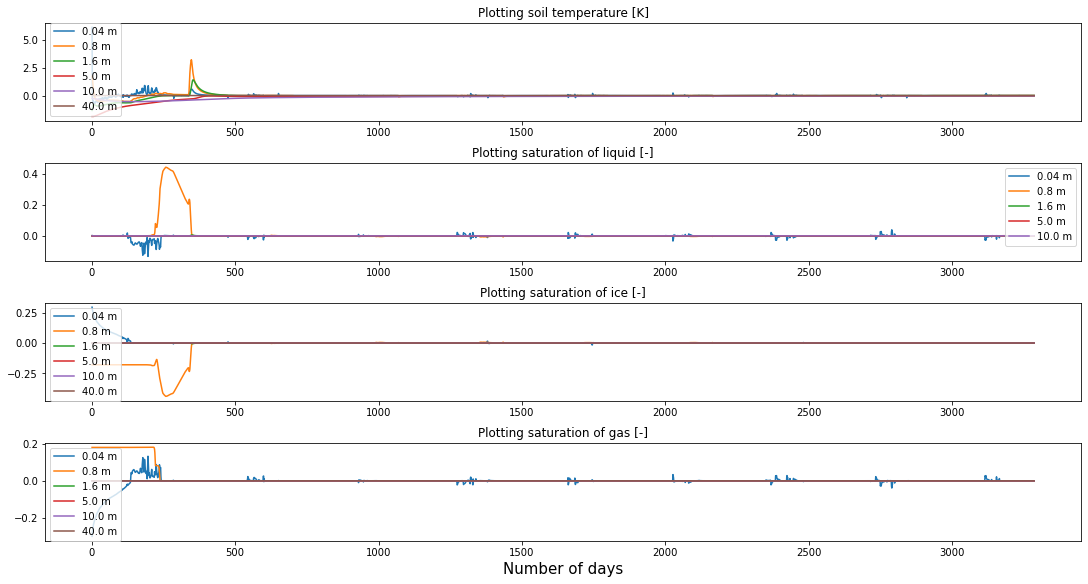

In [121]:
### Plotting the final results (mesured vs simulated) along with the parameters:
### Plotting the temperature for different alpha values at depth 0.01 m
fig2 = plt.figure(figsize=(15,8), constrained_layout=True)
spec2 = gridspec.GridSpec(ncols=1, nrows=4, height_ratios=[1,1,1,1], figure=fig2)
f2_ax1 = fig2.add_subplot(spec2[0, 0])
f2_ax2 = fig2.add_subplot(spec2[1, 0])
f2_ax3 = fig2.add_subplot(spec2[2, 0])
f2_ax4 = fig2.add_subplot(spec2[3, 0])

# Plotting temperature
f2_ax1.set_title('Plotting soil temperature [K]')
#plt.plot(df_observation['point -0.01 temperature [K]'][:1000],label='0.01 m')
f2_ax1.plot(df_eqn_check['point -0.04 temperature [K]'],label='0.04 m')
#f2_ax1.plot(df_observation['point -0.04 temperature [K]'],'r--',label='0.04 m')
#f2_ax1.plot(df_observation['point -0.2 temperature [K]'],label='0.2 m')
#f2_ax1.plot(df_observation['point -0.4 temperature [K]'],label='0.4 m')
f2_ax1.plot(df_eqn_check['point -0.8 temperature [K]'],label='0.8 m')
#f2_ax1.plot(df_observation['point -1.2 temperature [K]'],label='1.2 m')
f2_ax1.plot(df_eqn_check['point -1.6 temperature [K]'],label='1.6 m')
f2_ax1.plot(df_eqn_check['point -5.0 temperature [K]'],label='5.0 m')
f2_ax1.plot(df_eqn_check['point -10.0 temperature [K]'],label='10.0 m')
#f2_ax1.plot(df_observation['point -20.0 temperature [K]'],label='20.0 m')
f2_ax1.plot(df_eqn_check['point -40.0 temperature [K]'],label='40.0 m')
f2_ax1.legend()

# Plotting saturation of liquid
f2_ax2.set_title('Plotting saturation of liquid [-]')
#plt.plot(df_observation['point -0.01 temperature [K]'][:1000],label='0.01 m')
f2_ax2.plot(df_eqn_check['point -0.04 saturation liquid'],label='0.04 m')
#f2_ax2.plot(df_observation['point -0.2 saturation liquid'],label='0.2 m')
#f2_ax2.plot(df_observation['point -0.4 saturation liquid'],label='0.4 m')
f2_ax2.plot(df_eqn_check['point -0.8 saturation liquid'],label='0.8 m')
#f2_ax2.plot(df_observation['point -1.2 saturation liquid'],label='1.2 m')
f2_ax2.plot(df_eqn_check['point -1.6 saturation liquid'],label='1.6 m')
f2_ax2.plot(df_eqn_check['point -5.0 saturation liquid'],label='5.0 m')
f2_ax2.plot(df_eqn_check['point -10.0 saturation liquid'],label='10.0 m')
#f2_ax2.plot(df_eqn_check['point -40.0 saturation liquid'],label='40.0 m')
f2_ax2.legend()

# Plotting saturation of ice
f2_ax3.set_title('Plotting saturation of ice [-]')
#plt.plot(df_observation['point -0.01 temperature [K]'][:1000],label='0.01 m')
f2_ax3.plot(df_eqn_check['point -0.04 saturation ice'],label='0.04 m')
#f2_ax3.plot(df_observation['point -0.2 saturation ice'],label='0.2 m')
#f2_ax3.plot(df_observation['point -0.4 saturation ice'],label='0.4 m')
f2_ax3.plot(df_eqn_check['point -0.8 saturation ice'],label='0.8 m')
#f2_ax3.plot(df_observation['point -1.2 saturation ice'],label='1.2 m')
f2_ax3.plot(df_eqn_check['point -1.6 saturation ice'],label='1.6 m')
f2_ax3.plot(df_eqn_check['point -5.0 saturation ice'],label='5.0 m')
f2_ax3.plot(df_eqn_check['point -10.0 saturation ice'],label='10.0 m')
#f2_ax3.plot(df_observation['point -20.0 saturation ice'],label='20.0 m')
f2_ax3.plot(df_eqn_check['point -40.0 saturation ice'],label='40.0 m')
f2_ax3.legend()

# Plotting saturation of gas
f2_ax4.set_title('Plotting saturation of gas [-]')
#plt.plot(df_observation['point -0.01 temperature [K]'][:1000],label='0.01 m')
f2_ax4.plot(df_eqn_check['point -0.04 saturation gas'],label='0.04 m')
#f2_ax4.plot(df_observation['point -0.2 saturation gas'],label='0.2 m')
#f2_ax4.plot(df_observation['point -0.4 saturation gas'],label='0.4 m')
f2_ax4.plot(df_eqn_check['point -0.8 saturation gas'],label='0.8 m')
#f2_ax4.plot(df_observation['point -1.2 saturation gas'],label='1.2 m')
f2_ax4.plot(df_eqn_check['point -1.6 saturation gas'],label='1.6 m')
#f2_ax4.plot(df_observation['point -1.6 saturation gas'],label='1.6 m')
f2_ax4.plot(df_eqn_check['point -5.0 saturation gas'],label='5.0 m')
f2_ax4.plot(df_eqn_check['point -10.0 saturation gas'],label='10.0 m')
f2_ax4.plot(df_eqn_check['point -40.0 saturation gas'],label='40.0 m')
f2_ax4.set_xlabel('Number of days',fontsize=15)
f2_ax4.legend()

### Comments:
- The simulation results have mostly stabilised after 10 years - so good!

In [124]:
# Reading the csv file 
#/home/rk/ats_rk/testing/ats-demos/rk_model/Spinup_final_10032022/Case1_B_cv_spinup_II_final.demo
df_observation = pd.read_csv('Case5_I_E_cv_spinup_III_HD2.demo/observations.dat', skiprows=346, sep=' ')
df_observation['time [days]'] = df_observation['time [s]']/86400
df_observation.index = df_observation['time [days]']

df_observation.head()

,time [s],water content [mol],surface water content [mol],snow water equivalent [mol],evaporation rate [m s^-1],discharge [mol s^-1],surface-subsurface flux [mol s^-1],precipitation rain [m s^-1],precipitation snow [m s^-1],snow melt [m s^-1],...,point -0.4 saturation gas,point -0.8 saturation gas,point -1.2 saturation gas,point -1.6 saturation gas,point -5.0 saturation gas,point -10.0 saturation gas,point -20.0 saturation gas,point -30.0 saturation gas,point -40.0 saturation gas,time [days]
time [days],,,,,,,,,,,,,,,,,,,,,
0.0,0.0,717471.281270,0.0,0.0,1.269009e-08,0.0,0.0,0.0,0.0,0.0,...,0.380012,0.344078,0.286192,0.197672,0.0,0.0,0.0,0.0,0.0,0.0
1.0,86400.0,717442.999865,0.0,0.0,5.579533e-09,0.0,0.0,0.0,0.0,0.0,...,0.380011,0.344078,0.286192,0.197672,0.0,0.0,0.0,0.0,0.0,1.0
2.0,172800.0,717426.425463,0.0,0.0,3.464673e-09,0.0,0.0,0.0,0.0,0.0,...,0.380015,0.344080,0.286193,0.197673,0.0,0.0,0.0,0.0,0.0,2.0
3.0,259200.0,717409.904969,0.0,0.0,3.453959e-09,0.0,0.0,0.0,0.0,0.0,...,0.380019,0.344082,0.286194,0.197674,0.0,0.0,0.0,0.0,0.0,3.0
4.0,345600.0,717389.805781,0.0,0.0,4.200065e-09,0.0,0.0,0.0,0.0,0.0,...,0.380022,0.344085,0.286197,0.197676,0.0,0.0,0.0,0.0,0.0,4.0


In [125]:
len(df_observation)

3651

#### Plotting the values 
##### 1. Subsurface temperature

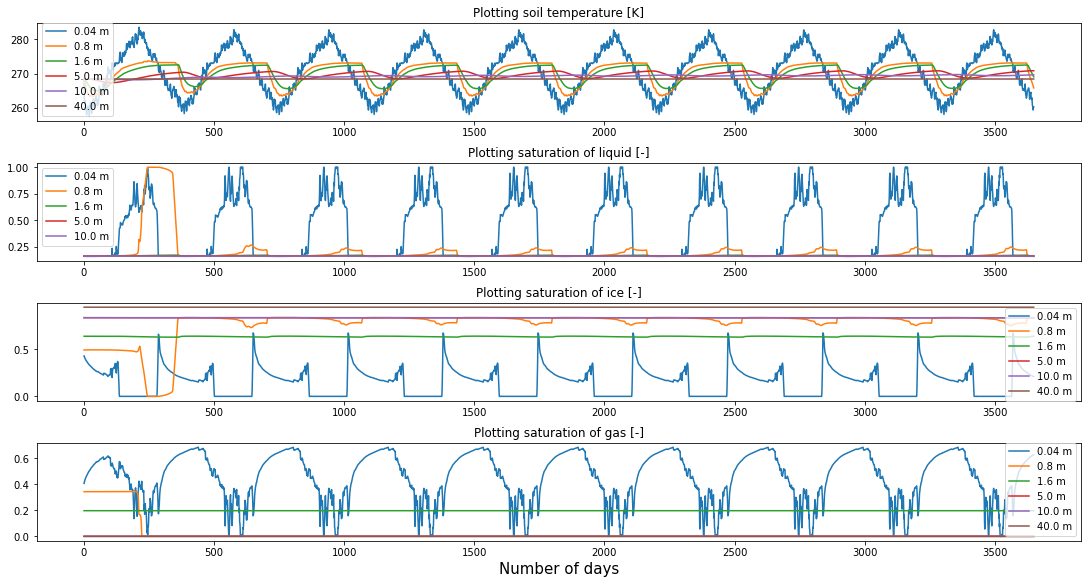

In [126]:
### Plotting the final results (mesured vs simulated) along with the parameters:
### Plotting the temperature for different alpha values at depth 0.01 m
fig2 = plt.figure(figsize=(15,8), constrained_layout=True)
spec2 = gridspec.GridSpec(ncols=1, nrows=4, height_ratios=[1,1,1,1], figure=fig2)
f2_ax1 = fig2.add_subplot(spec2[0, 0])
f2_ax2 = fig2.add_subplot(spec2[1, 0])
f2_ax3 = fig2.add_subplot(spec2[2, 0])
f2_ax4 = fig2.add_subplot(spec2[3, 0])

# Plotting temperature
f2_ax1.set_title('Plotting soil temperature [K]')
#plt.plot(df_observation['point -0.01 temperature [K]'][:1000],label='0.01 m')
f2_ax1.plot(df_observation['point -0.04 temperature [K]'],label='0.04 m')
#f2_ax1.plot(df_observation['point -0.04 temperature [K]'],'r--',label='0.04 m')
#f2_ax1.plot(df_observation['point -0.2 temperature [K]'],label='0.2 m')
#f2_ax1.plot(df_observation['point -0.4 temperature [K]'],label='0.4 m')
f2_ax1.plot(df_observation['point -0.8 temperature [K]'],label='0.8 m')
#f2_ax1.plot(df_observation['point -1.2 temperature [K]'],label='1.2 m')
f2_ax1.plot(df_observation['point -1.6 temperature [K]'],label='1.6 m')
f2_ax1.plot(df_observation['point -5.0 temperature [K]'],label='5.0 m')
f2_ax1.plot(df_observation['point -10.0 temperature [K]'],label='10.0 m')
#f2_ax1.plot(df_observation['point -20.0 temperature [K]'],label='20.0 m')
f2_ax1.plot(df_observation['point -40.0 temperature [K]'],label='40.0 m')
f2_ax1.legend()

# Plotting saturation of liquid
f2_ax2.set_title('Plotting saturation of liquid [-]')
#plt.plot(df_observation['point -0.01 temperature [K]'][:1000],label='0.01 m')
f2_ax2.plot(df_observation['point -0.04 saturation liquid'],label='0.04 m')
#f2_ax2.plot(df_observation['point -0.2 saturation liquid'],label='0.2 m')
#f2_ax2.plot(df_observation['point -0.4 saturation liquid'],label='0.4 m')
f2_ax2.plot(df_observation['point -0.8 saturation liquid'],label='0.8 m')
#f2_ax2.plot(df_observation['point -1.2 saturation liquid'],label='1.2 m')
f2_ax2.plot(df_observation['point -1.6 saturation liquid'],label='1.6 m')
f2_ax2.plot(df_observation['point -5.0 saturation liquid'],label='5.0 m')
f2_ax2.plot(df_observation['point -10.0 saturation liquid'],label='10.0 m')
#f2_ax2.plot(df_observation['point -40.0 saturation liquid'],label='40.0 m')
f2_ax2.legend()

# Plotting saturation of ice
f2_ax3.set_title('Plotting saturation of ice [-]')
#plt.plot(df_observation['point -0.01 temperature [K]'][:1000],label='0.01 m')
f2_ax3.plot(df_observation['point -0.04 saturation ice'],label='0.04 m')
#f2_ax3.plot(df_observation['point -0.2 saturation ice'],label='0.2 m')
#f2_ax3.plot(df_observation['point -0.4 saturation ice'],label='0.4 m')
f2_ax3.plot(df_observation['point -0.8 saturation ice'],label='0.8 m')
#f2_ax3.plot(df_observation['point -1.2 saturation ice'],label='1.2 m')
f2_ax3.plot(df_observation['point -1.6 saturation ice'],label='1.6 m')
f2_ax3.plot(df_observation['point -5.0 saturation ice'],label='5.0 m')
f2_ax3.plot(df_observation['point -10.0 saturation ice'],label='10.0 m')
#f2_ax3.plot(df_observation['point -20.0 saturation ice'],label='20.0 m')
f2_ax3.plot(df_observation['point -40.0 saturation ice'],label='40.0 m')
f2_ax3.legend()

# Plotting saturation of gas
f2_ax4.set_title('Plotting saturation of gas [-]')
#plt.plot(df_observation['point -0.01 temperature [K]'][:1000],label='0.01 m')
f2_ax4.plot(df_observation['point -0.04 saturation gas'],label='0.04 m')
#f2_ax4.plot(df_observation['point -0.2 saturation gas'],label='0.2 m')
#f2_ax4.plot(df_observation['point -0.4 saturation gas'],label='0.4 m')
f2_ax4.plot(df_observation['point -0.8 saturation gas'],label='0.8 m')
#f2_ax4.plot(df_observation['point -1.2 saturation gas'],label='1.2 m')
f2_ax4.plot(df_observation['point -1.6 saturation gas'],label='1.6 m')
#f2_ax4.plot(df_observation['point -1.6 saturation gas'],label='1.6 m')
f2_ax4.plot(df_observation['point -5.0 saturation gas'],label='5.0 m')
f2_ax4.plot(df_observation['point -10.0 saturation gas'],label='10.0 m')
f2_ax4.plot(df_observation['point -40.0 saturation gas'],label='40.0 m')
f2_ax4.set_xlabel('Number of days',fontsize=15)
f2_ax4.legend()

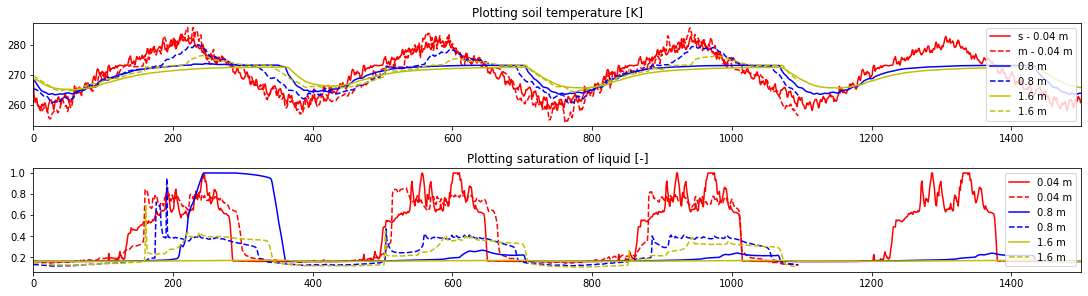

In [127]:
### Plotting the final results (mesured vs simulated) along with the parameters:
### Plotting the temperature for different alpha values at depth 0.01 m
fig2 = plt.figure(figsize=(15,4), constrained_layout=True)
spec2 = gridspec.GridSpec(ncols=1, nrows=2, height_ratios=[1,1], figure=fig2)
f2_ax1 = fig2.add_subplot(spec2[0, 0])
f2_ax2 = fig2.add_subplot(spec2[1, 0])


# Plotting temperature
f2_ax1.set_title('Plotting soil temperature [K]')
#plt.plot(df_observation['point -0.01 temperature [K]'][:1000],label='0.01 m')
f2_ax1.plot(df_observation['point -0.04 temperature [K]'],'r',label='s - 0.04 m')
f2_ax1.plot(df_obs_AWS['point -0.04 temperature [K]'].values,'r--',label='m - 0.04 m')

#f2_ax1.plot(df_observation['point -0.2 temperature [K]'],label='0.2 m')
#f2_ax1.plot(df_observation['point -0.4 temperature [K]'],label='0.4 m')
f2_ax1.plot(df_observation['point -0.8 temperature [K]'],'b',label='0.8 m')
f2_ax1.plot(df_obs_AWS['point -0.8 temperature [K]'].values,'b--',label='0.8 m')
#f2_ax1.plot(df_observation['point -1.2 temperature [K]'],label='1.2 m')
f2_ax1.plot(df_observation['point -1.6 temperature [K]'],'y',label='1.6 m')
f2_ax1.plot(df_obs_AWS['point -1.6 temperature [K]'].values,'y--',label='1.6 m')
f2_ax1.set_xlim(0,1500)
f2_ax1.legend()

# Plotting saturation of liquid
f2_ax2.set_title('Plotting saturation of liquid [-]')
#plt.plot(df_observation['point -0.01 temperature [K]'][:1000],label='0.01 m')
f2_ax2.plot(df_observation['point -0.04 saturation liquid'],'r',label='0.04 m')
f2_ax2.plot(df_obs_AWS['point -0.04 saturation liquid'].values,'r--',label='0.04 m')

#f2_ax1.plot(df_observation['point -0.2 temperature [K]'],label='0.2 m')
#f2_ax1.plot(df_observation['point -0.4 temperature [K]'],label='0.4 m')
f2_ax2.plot(df_observation['point -0.8 saturation liquid'],'b',label='0.8 m')
f2_ax2.plot(df_obs_AWS['point -0.8 saturation liquid'].values,'b--',label='0.8 m')
#f2_ax1.plot(df_observation['point -1.2 temperature [K]'],label='1.2 m')
f2_ax2.plot(df_observation['point -1.6 saturation liquid'],'y',label='1.6 m')
f2_ax2.plot(df_obs_AWS['point -1.6 saturation liquid'].values,'y--',label='1.6 m')
f2_ax2.set_xlim(0,1500)
f2_ax2.legend()

In [128]:
df_eqn_check = df_observation.iloc[1:,:].copy()

no_itr = 9

all_columns = df_eqn_check.columns

#for i, cols in enumerate(all_columns):
for i in np.arange(0,9,1):
    for j in np.arange(365):
        df_eqn_check.iloc[j+i*365,:] = df_observation.iloc[j+i*365,:] - df_observation.iloc[j+i*365+365,:]
        #print(j+i*365)
    #df_eqn_check.iloc[]
    #print(cols)
df_eqn_check.head()   

,time [s],water content [mol],surface water content [mol],snow water equivalent [mol],evaporation rate [m s^-1],discharge [mol s^-1],surface-subsurface flux [mol s^-1],precipitation rain [m s^-1],precipitation snow [m s^-1],snow melt [m s^-1],...,point -0.4 saturation gas,point -0.8 saturation gas,point -1.2 saturation gas,point -1.6 saturation gas,point -5.0 saturation gas,point -10.0 saturation gas,point -20.0 saturation gas,point -30.0 saturation gas,point -40.0 saturation gas,time [days]
time [days],,,,,,,,,,,,,,,,,,,,,
1.0,-31536000.0,-6728.323003,0.0,0.0,1.188376e-08,0.0,0.0,0.0,0.0,0.0,...,0.312094,0.344078,-0.000255,-0.000392,0.0,0.0,0.0,0.0,0.0,-365.0
2.0,-31536000.0,-6752.914403,0.0,0.0,4.808598e-09,0.0,0.0,0.0,0.0,0.0,...,0.312092,0.344078,-0.000144,-0.000287,0.0,0.0,0.0,0.0,0.0,-365.0
3.0,-31536000.0,-6767.037968,0.0,0.0,2.952388e-09,0.0,0.0,0.0,0.0,0.0,...,0.312084,0.344080,-0.000085,-0.000201,0.0,0.0,0.0,0.0,0.0,-365.0
4.0,-31536000.0,-6780.970936,0.0,0.0,2.913021e-09,0.0,0.0,0.0,0.0,0.0,...,0.312072,0.344082,-0.000049,-0.000136,0.0,0.0,0.0,0.0,0.0,-365.0
5.0,-31536000.0,-6797.687579,0.0,0.0,3.493281e-09,0.0,0.0,0.0,0.0,0.0,...,0.312067,0.344085,-0.000026,-0.000089,0.0,0.0,0.0,0.0,0.0,-365.0


In [129]:
df_eqn_check = df_eqn_check.iloc[:3285]

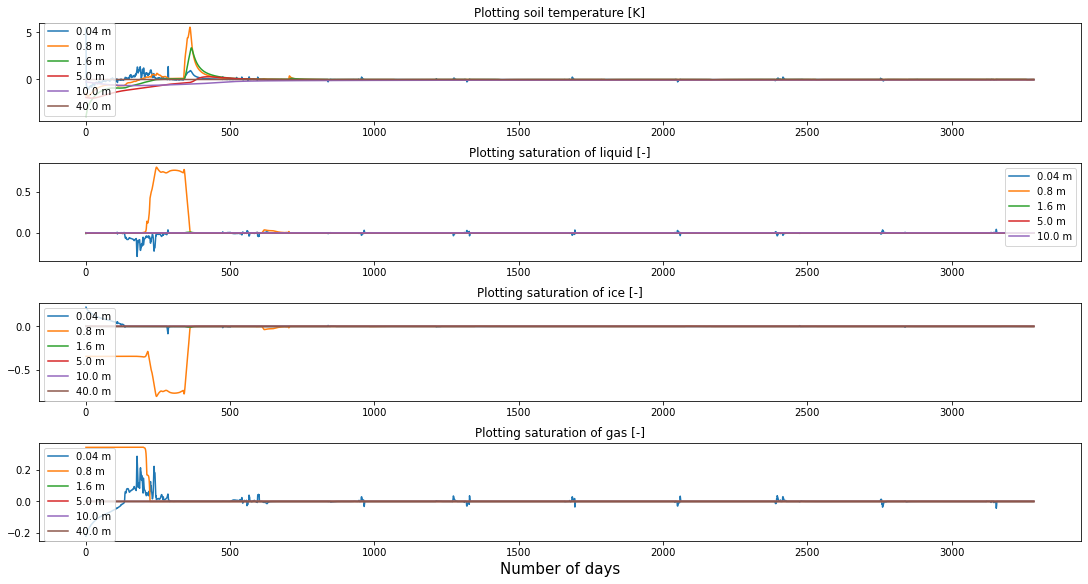

In [130]:
### Plotting the final results (mesured vs simulated) along with the parameters:
### Plotting the temperature for different alpha values at depth 0.01 m
fig2 = plt.figure(figsize=(15,8), constrained_layout=True)
spec2 = gridspec.GridSpec(ncols=1, nrows=4, height_ratios=[1,1,1,1], figure=fig2)
f2_ax1 = fig2.add_subplot(spec2[0, 0])
f2_ax2 = fig2.add_subplot(spec2[1, 0])
f2_ax3 = fig2.add_subplot(spec2[2, 0])
f2_ax4 = fig2.add_subplot(spec2[3, 0])

# Plotting temperature
f2_ax1.set_title('Plotting soil temperature [K]')
#plt.plot(df_observation['point -0.01 temperature [K]'][:1000],label='0.01 m')
f2_ax1.plot(df_eqn_check['point -0.04 temperature [K]'],label='0.04 m')
#f2_ax1.plot(df_observation['point -0.04 temperature [K]'],'r--',label='0.04 m')
#f2_ax1.plot(df_observation['point -0.2 temperature [K]'],label='0.2 m')
#f2_ax1.plot(df_observation['point -0.4 temperature [K]'],label='0.4 m')
f2_ax1.plot(df_eqn_check['point -0.8 temperature [K]'],label='0.8 m')
#f2_ax1.plot(df_observation['point -1.2 temperature [K]'],label='1.2 m')
f2_ax1.plot(df_eqn_check['point -1.6 temperature [K]'],label='1.6 m')
f2_ax1.plot(df_eqn_check['point -5.0 temperature [K]'],label='5.0 m')
f2_ax1.plot(df_eqn_check['point -10.0 temperature [K]'],label='10.0 m')
#f2_ax1.plot(df_observation['point -20.0 temperature [K]'],label='20.0 m')
f2_ax1.plot(df_eqn_check['point -40.0 temperature [K]'],label='40.0 m')
f2_ax1.legend()

# Plotting saturation of liquid
f2_ax2.set_title('Plotting saturation of liquid [-]')
#plt.plot(df_observation['point -0.01 temperature [K]'][:1000],label='0.01 m')
f2_ax2.plot(df_eqn_check['point -0.04 saturation liquid'],label='0.04 m')
#f2_ax2.plot(df_observation['point -0.2 saturation liquid'],label='0.2 m')
#f2_ax2.plot(df_observation['point -0.4 saturation liquid'],label='0.4 m')
f2_ax2.plot(df_eqn_check['point -0.8 saturation liquid'],label='0.8 m')
#f2_ax2.plot(df_observation['point -1.2 saturation liquid'],label='1.2 m')
f2_ax2.plot(df_eqn_check['point -1.6 saturation liquid'],label='1.6 m')
f2_ax2.plot(df_eqn_check['point -5.0 saturation liquid'],label='5.0 m')
f2_ax2.plot(df_eqn_check['point -10.0 saturation liquid'],label='10.0 m')
#f2_ax2.plot(df_eqn_check['point -40.0 saturation liquid'],label='40.0 m')
f2_ax2.legend()

# Plotting saturation of ice
f2_ax3.set_title('Plotting saturation of ice [-]')
#plt.plot(df_observation['point -0.01 temperature [K]'][:1000],label='0.01 m')
f2_ax3.plot(df_eqn_check['point -0.04 saturation ice'],label='0.04 m')
#f2_ax3.plot(df_observation['point -0.2 saturation ice'],label='0.2 m')
#f2_ax3.plot(df_observation['point -0.4 saturation ice'],label='0.4 m')
f2_ax3.plot(df_eqn_check['point -0.8 saturation ice'],label='0.8 m')
#f2_ax3.plot(df_observation['point -1.2 saturation ice'],label='1.2 m')
f2_ax3.plot(df_eqn_check['point -1.6 saturation ice'],label='1.6 m')
f2_ax3.plot(df_eqn_check['point -5.0 saturation ice'],label='5.0 m')
f2_ax3.plot(df_eqn_check['point -10.0 saturation ice'],label='10.0 m')
#f2_ax3.plot(df_observation['point -20.0 saturation ice'],label='20.0 m')
f2_ax3.plot(df_eqn_check['point -40.0 saturation ice'],label='40.0 m')
f2_ax3.legend()

# Plotting saturation of gas
f2_ax4.set_title('Plotting saturation of gas [-]')
#plt.plot(df_observation['point -0.01 temperature [K]'][:1000],label='0.01 m')
f2_ax4.plot(df_eqn_check['point -0.04 saturation gas'],label='0.04 m')
#f2_ax4.plot(df_observation['point -0.2 saturation gas'],label='0.2 m')
#f2_ax4.plot(df_observation['point -0.4 saturation gas'],label='0.4 m')
f2_ax4.plot(df_eqn_check['point -0.8 saturation gas'],label='0.8 m')
#f2_ax4.plot(df_observation['point -1.2 saturation gas'],label='1.2 m')
f2_ax4.plot(df_eqn_check['point -1.6 saturation gas'],label='1.6 m')
#f2_ax4.plot(df_observation['point -1.6 saturation gas'],label='1.6 m')
f2_ax4.plot(df_eqn_check['point -5.0 saturation gas'],label='5.0 m')
f2_ax4.plot(df_eqn_check['point -10.0 saturation gas'],label='10.0 m')
f2_ax4.plot(df_eqn_check['point -40.0 saturation gas'],label='40.0 m')
f2_ax4.set_xlabel('Number of days',fontsize=15)
f2_ax4.legend()

In [ ]:
### Plotting the final results (mesured vs simulated) along with the parameters:
### Plotting the temperature for different alpha values at depth 0.01 m
fig2 = plt.figure(figsize=(15,8), constrained_layout=True)
spec2 = gridspec.GridSpec(ncols=1, nrows=4, height_ratios=[1,1,1,1], figure=fig2)
f2_ax1 = fig2.add_subplot(spec2[0, 0])
f2_ax2 = fig2.add_subplot(spec2[1, 0])
f2_ax3 = fig2.add_subplot(spec2[2, 0])
f2_ax4 = fig2.add_subplot(spec2[3, 0])

# Plotting temperature
f2_ax1.set_title('Plotting soil temperature [K]')
#plt.plot(df_observation['point -0.01 temperature [K]'][:1000],label='0.01 m')
f2_ax1.plot(df_observation['point -0.04 temperature [K]'],'r',label='0.04 m')
f2_ax1.plot(df_observation['point -0.04 temperature [K]'],'r--',label='0.04 m')

#f2_ax1.plot(df_observation['point -0.2 temperature [K]'],label='0.2 m')
#f2_ax1.plot(df_observation['point -0.4 temperature [K]'],label='0.4 m')
f2_ax1.plot(df_observation['point -0.8 temperature [K]'],'b',label='0.8 m')
f2_ax1.plot(df_observation['point -0.8 temperature [K]'],'b--',label='0.8 m')
#f2_ax1.plot(df_observation['point -1.2 temperature [K]'],label='1.2 m')
f2_ax1.plot(df_observation['point -1.6 temperature [K]'],'y',label='1.6 m')
f2_ax1.plot(df_observation['point -1.6 temperature [K]'],'y--',label='1.6 m')
#f2_ax1.plot(df_observation['point -5.0 temperature [K]'],label='5.0 m')
#f2_ax1.plot(df_observation['point -10.0 temperature [K]'],label='10.0 m')
#f2_ax1.plot(df_observation['point -20.0 temperature [K]'],label='20.0 m')
#f2_ax1.plot(df_observation['point -40.0 temperature [K]'],label='40.0 m')
f2_ax1.legend()

# Plotting saturation of liquid
f2_ax2.set_title('Plotting saturation of liquid [-]')
#plt.plot(df_observation['point -0.01 temperature [K]'][:1000],label='0.01 m')
f2_ax2.plot(df_observation['point -0.04 saturation liquid'],label='0.04 m')
#f2_ax2.plot(df_observation['point -0.2 saturation liquid'],label='0.2 m')
#f2_ax2.plot(df_observation['point -0.4 saturation liquid'],label='0.4 m')
f2_ax2.plot(df_observation['point -0.8 saturation liquid'],label='0.8 m')
#f2_ax2.plot(df_observation['point -1.2 saturation liquid'],label='1.2 m')
f2_ax2.plot(df_observation['point -1.6 saturation liquid'],label='1.6 m')
f2_ax2.plot(df_observation['point -5.0 saturation liquid'],label='5.0 m')
f2_ax2.plot(df_observation['point -10.0 saturation liquid'],label='10.0 m')
f2_ax2.plot(df_observation['point -40.0 saturation liquid'],label='40.0 m')
f2_ax2.legend()

# Plotting saturation of ice
f2_ax3.set_title('Plotting saturation of ice [-]')
#plt.plot(df_observation['point -0.01 temperature [K]'][:1000],label='0.01 m')
f2_ax3.plot(df_observation['point -0.04 saturation ice'],label='0.04 m')
#f2_ax3.plot(df_observation['point -0.2 saturation ice'],label='0.2 m')
#f2_ax3.plot(df_observation['point -0.4 saturation ice'],label='0.4 m')
f2_ax3.plot(df_observation['point -0.8 saturation ice'],label='0.8 m')
#f2_ax3.plot(df_observation['point -1.2 saturation ice'],label='1.2 m')
f2_ax3.plot(df_observation['point -1.6 saturation ice'],label='1.6 m')
f2_ax3.plot(df_observation['point -5.0 saturation ice'],label='5.0 m')
f2_ax3.plot(df_observation['point -10.0 saturation ice'],label='10.0 m')
#f2_ax3.plot(df_observation['point -20.0 saturation ice'],label='20.0 m')
f2_ax3.plot(df_observation['point -40.0 saturation ice'],label='40.0 m')
f2_ax3.legend()

# Plotting saturation of gas
f2_ax4.set_title('Plotting saturation of gas [-]')
#plt.plot(df_observation['point -0.01 temperature [K]'][:1000],label='0.01 m')
f2_ax4.plot(df_observation['point -0.04 saturation gas'],label='0.04 m')
#f2_ax4.plot(df_observation['point -0.2 saturation gas'],label='0.2 m')
#f2_ax4.plot(df_observation['point -0.4 saturation gas'],label='0.4 m')
f2_ax4.plot(df_observation['point -0.8 saturation gas'],label='0.8 m')
#f2_ax4.plot(df_observation['point -1.2 saturation gas'],label='1.2 m')
f2_ax4.plot(df_observation['point -1.6 saturation gas'],label='1.6 m')
#f2_ax4.plot(df_observation['point -1.6 saturation gas'],label='1.6 m')
f2_ax4.plot(df_observation['point -5.0 saturation gas'],label='5.0 m')
f2_ax4.plot(df_observation['point -10.0 saturation gas'],label='10.0 m')
f2_ax4.plot(df_observation['point -40.0 saturation gas'],label='40.0 m')
f2_ax4.set_xlabel('Number of days',fontsize=15)
f2_ax4.legend()

In [140]:
# Reading the csv file 
#/home/rk/ats_rk/testing/ats-demos/rk_model/Spinup_final_10032022/Case1_B_cv_spinup_II_final.demo
df_observation = pd.read_csv('Case5_III_C_cv_spinup_IV.demo/observations.dat', skiprows=346, sep=' ')
df_observation['time [days]'] = df_observation['time [s]']/86400
df_observation.index = df_observation['time [days]']

df_observation.head()

,time [s],water content [mol],surface water content [mol],snow water equivalent [mol],evaporation rate [m s^-1],discharge [mol s^-1],surface-subsurface flux [mol s^-1],precipitation rain [m s^-1],precipitation snow [m s^-1],snow melt [m s^-1],...,point -0.4 saturation gas,point -0.8 saturation gas,point -1.2 saturation gas,point -1.6 saturation gas,point -5.0 saturation gas,point -10.0 saturation gas,point -20.0 saturation gas,point -30.0 saturation gas,point -40.0 saturation gas,time [days]
time [days],,,,,,,,,,,,,,,,,,,,,
0.0,0.0,717471.281270,0.0,0.000000,1.269009e-08,0.0,0.0,0.0,5.926505e-09,0.0,...,0.380012,0.344078,0.286192,0.197672,0.0,0.0,0.0,0.0,0.0,0.0
1.0,86400.0,717444.321362,0.0,0.000101,5.839146e-09,0.0,0.0,0.0,9.645046e-11,0.0,...,0.380011,0.344078,0.286192,0.197672,0.0,0.0,0.0,0.0,0.0,1.0
2.0,172800.0,717428.276168,0.0,0.000091,3.524713e-09,0.0,0.0,0.0,5.787037e-11,0.0,...,0.380015,0.344080,0.286193,0.197673,0.0,0.0,0.0,0.0,0.0,2.0
3.0,259200.0,717412.185796,0.0,0.000088,3.611167e-09,0.0,0.0,0.0,2.121912e-10,0.0,...,0.380019,0.344082,0.286194,0.197674,0.0,0.0,0.0,0.0,0.0,3.0
4.0,345600.0,717392.430129,0.0,0.000073,4.419895e-09,0.0,0.0,0.0,1.157407e-10,0.0,...,0.380022,0.344085,0.286197,0.197676,0.0,0.0,0.0,0.0,0.0,4.0


In [141]:
len(df_observation)

3651

#### Plotting the values 
##### 1. Subsurface temperature

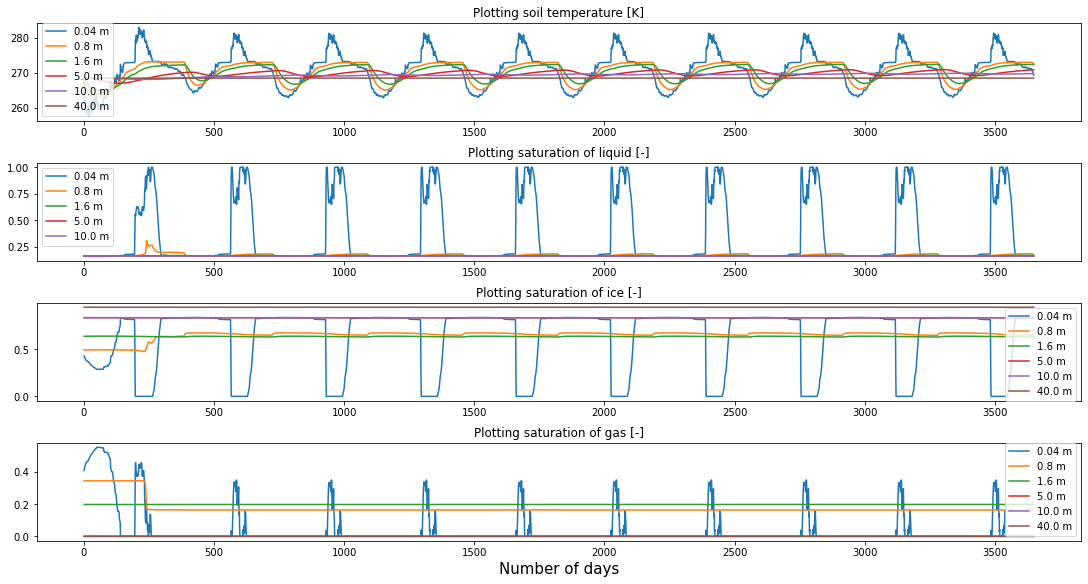

In [142]:
### Plotting the final results (mesured vs simulated) along with the parameters:
### Plotting the temperature for different alpha values at depth 0.01 m
fig2 = plt.figure(figsize=(15,8), constrained_layout=True)
spec2 = gridspec.GridSpec(ncols=1, nrows=4, height_ratios=[1,1,1,1], figure=fig2)
f2_ax1 = fig2.add_subplot(spec2[0, 0])
f2_ax2 = fig2.add_subplot(spec2[1, 0])
f2_ax3 = fig2.add_subplot(spec2[2, 0])
f2_ax4 = fig2.add_subplot(spec2[3, 0])

# Plotting temperature
f2_ax1.set_title('Plotting soil temperature [K]')
#plt.plot(df_observation['point -0.01 temperature [K]'][:1000],label='0.01 m')
f2_ax1.plot(df_observation['point -0.04 temperature [K]'],label='0.04 m')
#f2_ax1.plot(df_observation['point -0.04 temperature [K]'],'r--',label='0.04 m')
#f2_ax1.plot(df_observation['point -0.2 temperature [K]'],label='0.2 m')
#f2_ax1.plot(df_observation['point -0.4 temperature [K]'],label='0.4 m')
f2_ax1.plot(df_observation['point -0.8 temperature [K]'],label='0.8 m')
#f2_ax1.plot(df_observation['point -1.2 temperature [K]'],label='1.2 m')
f2_ax1.plot(df_observation['point -1.6 temperature [K]'],label='1.6 m')
f2_ax1.plot(df_observation['point -5.0 temperature [K]'],label='5.0 m')
f2_ax1.plot(df_observation['point -10.0 temperature [K]'],label='10.0 m')
#f2_ax1.plot(df_observation['point -20.0 temperature [K]'],label='20.0 m')
f2_ax1.plot(df_observation['point -40.0 temperature [K]'],label='40.0 m')
f2_ax1.legend()

# Plotting saturation of liquid
f2_ax2.set_title('Plotting saturation of liquid [-]')
#plt.plot(df_observation['point -0.01 temperature [K]'][:1000],label='0.01 m')
f2_ax2.plot(df_observation['point -0.04 saturation liquid'],label='0.04 m')
#f2_ax2.plot(df_observation['point -0.2 saturation liquid'],label='0.2 m')
#f2_ax2.plot(df_observation['point -0.4 saturation liquid'],label='0.4 m')
f2_ax2.plot(df_observation['point -0.8 saturation liquid'],label='0.8 m')
#f2_ax2.plot(df_observation['point -1.2 saturation liquid'],label='1.2 m')
f2_ax2.plot(df_observation['point -1.6 saturation liquid'],label='1.6 m')
f2_ax2.plot(df_observation['point -5.0 saturation liquid'],label='5.0 m')
f2_ax2.plot(df_observation['point -10.0 saturation liquid'],label='10.0 m')
#f2_ax2.plot(df_observation['point -40.0 saturation liquid'],label='40.0 m')
f2_ax2.legend()

# Plotting saturation of ice
f2_ax3.set_title('Plotting saturation of ice [-]')
#plt.plot(df_observation['point -0.01 temperature [K]'][:1000],label='0.01 m')
f2_ax3.plot(df_observation['point -0.04 saturation ice'],label='0.04 m')
#f2_ax3.plot(df_observation['point -0.2 saturation ice'],label='0.2 m')
#f2_ax3.plot(df_observation['point -0.4 saturation ice'],label='0.4 m')
f2_ax3.plot(df_observation['point -0.8 saturation ice'],label='0.8 m')
#f2_ax3.plot(df_observation['point -1.2 saturation ice'],label='1.2 m')
f2_ax3.plot(df_observation['point -1.6 saturation ice'],label='1.6 m')
f2_ax3.plot(df_observation['point -5.0 saturation ice'],label='5.0 m')
f2_ax3.plot(df_observation['point -10.0 saturation ice'],label='10.0 m')
#f2_ax3.plot(df_observation['point -20.0 saturation ice'],label='20.0 m')
f2_ax3.plot(df_observation['point -40.0 saturation ice'],label='40.0 m')
f2_ax3.legend()

# Plotting saturation of gas
f2_ax4.set_title('Plotting saturation of gas [-]')
#plt.plot(df_observation['point -0.01 temperature [K]'][:1000],label='0.01 m')
f2_ax4.plot(df_observation['point -0.04 saturation gas'],label='0.04 m')
#f2_ax4.plot(df_observation['point -0.2 saturation gas'],label='0.2 m')
#f2_ax4.plot(df_observation['point -0.4 saturation gas'],label='0.4 m')
f2_ax4.plot(df_observation['point -0.8 saturation gas'],label='0.8 m')
#f2_ax4.plot(df_observation['point -1.2 saturation gas'],label='1.2 m')
f2_ax4.plot(df_observation['point -1.6 saturation gas'],label='1.6 m')
#f2_ax4.plot(df_observation['point -1.6 saturation gas'],label='1.6 m')
f2_ax4.plot(df_observation['point -5.0 saturation gas'],label='5.0 m')
f2_ax4.plot(df_observation['point -10.0 saturation gas'],label='10.0 m')
f2_ax4.plot(df_observation['point -40.0 saturation gas'],label='40.0 m')
f2_ax4.set_xlabel('Number of days',fontsize=15)
f2_ax4.legend()

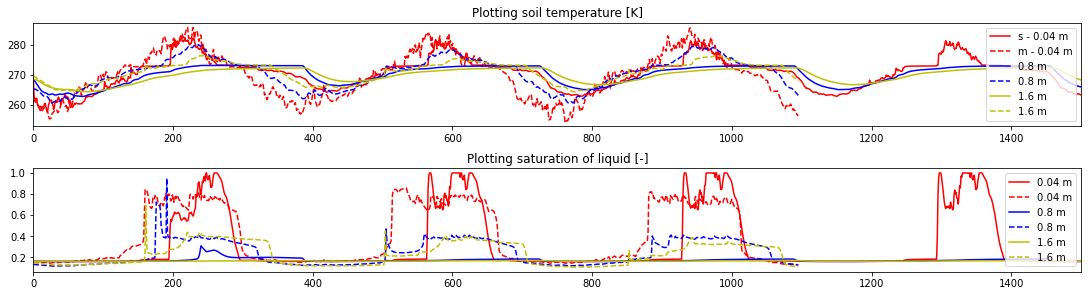

In [143]:
### Plotting the final results (mesured vs simulated) along with the parameters:
### Plotting the temperature for different alpha values at depth 0.01 m
fig2 = plt.figure(figsize=(15,4), constrained_layout=True)
spec2 = gridspec.GridSpec(ncols=1, nrows=2, height_ratios=[1,1], figure=fig2)
f2_ax1 = fig2.add_subplot(spec2[0, 0])
f2_ax2 = fig2.add_subplot(spec2[1, 0])


# Plotting temperature
f2_ax1.set_title('Plotting soil temperature [K]')
#plt.plot(df_observation['point -0.01 temperature [K]'][:1000],label='0.01 m')
f2_ax1.plot(df_observation['point -0.04 temperature [K]'],'r',label='s - 0.04 m')
f2_ax1.plot(df_obs_AWS['point -0.04 temperature [K]'].values,'r--',label='m - 0.04 m')

#f2_ax1.plot(df_observation['point -0.2 temperature [K]'],label='0.2 m')
#f2_ax1.plot(df_observation['point -0.4 temperature [K]'],label='0.4 m')
f2_ax1.plot(df_observation['point -0.8 temperature [K]'],'b',label='0.8 m')
f2_ax1.plot(df_obs_AWS['point -0.8 temperature [K]'].values,'b--',label='0.8 m')
#f2_ax1.plot(df_observation['point -1.2 temperature [K]'],label='1.2 m')
f2_ax1.plot(df_observation['point -1.6 temperature [K]'],'y',label='1.6 m')
f2_ax1.plot(df_obs_AWS['point -1.6 temperature [K]'].values,'y--',label='1.6 m')
f2_ax1.set_xlim(0,1500)
f2_ax1.legend()

# Plotting saturation of liquid
f2_ax2.set_title('Plotting saturation of liquid [-]')
#plt.plot(df_observation['point -0.01 temperature [K]'][:1000],label='0.01 m')
f2_ax2.plot(df_observation['point -0.04 saturation liquid'],'r',label='0.04 m')
f2_ax2.plot(df_obs_AWS['point -0.04 saturation liquid'].values,'r--',label='0.04 m')

#f2_ax1.plot(df_observation['point -0.2 temperature [K]'],label='0.2 m')
#f2_ax1.plot(df_observation['point -0.4 temperature [K]'],label='0.4 m')
f2_ax2.plot(df_observation['point -0.8 saturation liquid'],'b',label='0.8 m')
f2_ax2.plot(df_obs_AWS['point -0.8 saturation liquid'].values,'b--',label='0.8 m')
#f2_ax1.plot(df_observation['point -1.2 temperature [K]'],label='1.2 m')
f2_ax2.plot(df_observation['point -1.6 saturation liquid'],'y',label='1.6 m')
f2_ax2.plot(df_obs_AWS['point -1.6 saturation liquid'].values,'y--',label='1.6 m')
f2_ax2.set_xlim(0,1500)
f2_ax2.legend()

In [144]:
df_eqn_check = df_observation.iloc[1:,:].copy()

no_itr = 9

all_columns = df_eqn_check.columns

#for i, cols in enumerate(all_columns):
for i in np.arange(0,9,1):
    for j in np.arange(365):
        df_eqn_check.iloc[j+i*365,:] = df_observation.iloc[j+i*365,:] - df_observation.iloc[j+i*365+365,:]
        #print(j+i*365)
    #df_eqn_check.iloc[]
    #print(cols)
df_eqn_check.head()   

,time [s],water content [mol],surface water content [mol],snow water equivalent [mol],evaporation rate [m s^-1],discharge [mol s^-1],surface-subsurface flux [mol s^-1],precipitation rain [m s^-1],precipitation snow [m s^-1],snow melt [m s^-1],...,point -0.4 saturation gas,point -0.8 saturation gas,point -1.2 saturation gas,point -1.6 saturation gas,point -5.0 saturation gas,point -10.0 saturation gas,point -20.0 saturation gas,point -30.0 saturation gas,point -40.0 saturation gas,time [days]
time [days],,,,,,,,,,,,,,,,,,,,,
1.0,-31536000.0,-7936.518701,-1052.639022,-0.124036,1.697255e-09,0.0,-9.782140e-12,0.0,0.0,0.0,...,0.380012,0.179538,-0.000636,-0.000288,0.0,0.0,0.0,0.0,0.0,-365.0
2.0,-31536000.0,-7963.478608,-1052.639023,-0.123353,-9.901595e-10,0.0,-9.926095e-12,0.0,0.0,0.0,...,0.380011,0.179541,-0.000637,-0.000289,0.0,0.0,0.0,0.0,0.0,-365.0
3.0,-31536000.0,-7979.523801,-1052.639024,-0.123129,7.624564e-10,0.0,-9.007082e-12,0.0,0.0,0.0,...,0.380015,0.179545,-0.000637,-0.000289,0.0,0.0,0.0,0.0,0.0,-365.0
4.0,-31536000.0,-7995.614173,-1052.639025,-0.122752,-9.972265e-10,0.0,-8.360722e-12,0.0,0.0,0.0,...,0.380019,0.179550,-0.000636,-0.000289,0.0,0.0,0.0,0.0,0.0,-365.0
5.0,-31536000.0,-8015.369839,-1052.639026,-0.122150,-2.844636e-09,0.0,-8.661977e-12,0.0,0.0,0.0,...,0.380022,0.179556,-0.000635,-0.000288,0.0,0.0,0.0,0.0,0.0,-365.0


In [145]:
df_eqn_check = df_eqn_check.iloc[:3285]

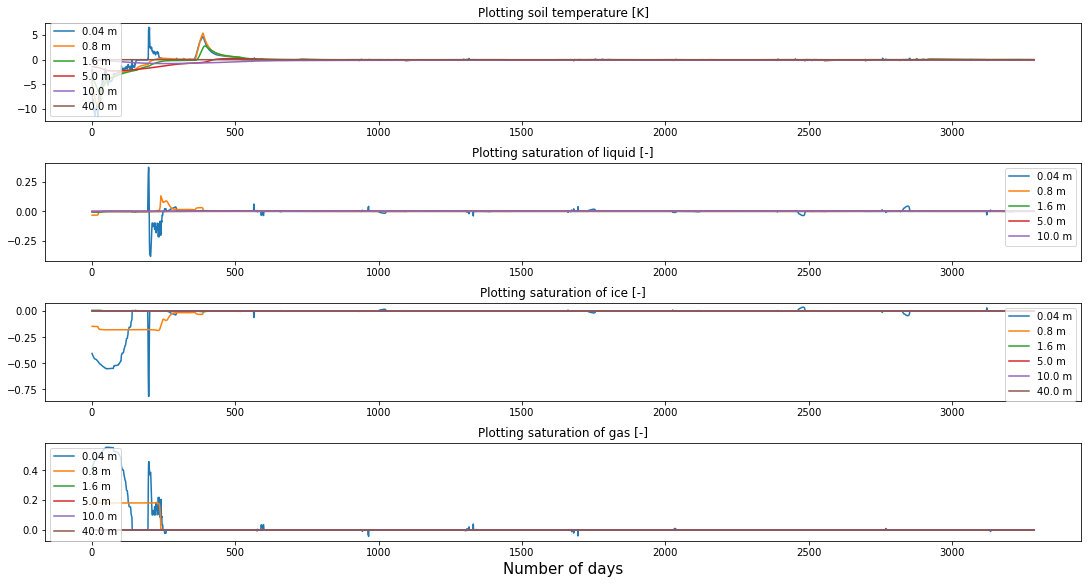

In [146]:
### Plotting the final results (mesured vs simulated) along with the parameters:
### Plotting the temperature for different alpha values at depth 0.01 m
fig2 = plt.figure(figsize=(15,8), constrained_layout=True)
spec2 = gridspec.GridSpec(ncols=1, nrows=4, height_ratios=[1,1,1,1], figure=fig2)
f2_ax1 = fig2.add_subplot(spec2[0, 0])
f2_ax2 = fig2.add_subplot(spec2[1, 0])
f2_ax3 = fig2.add_subplot(spec2[2, 0])
f2_ax4 = fig2.add_subplot(spec2[3, 0])

# Plotting temperature
f2_ax1.set_title('Plotting soil temperature [K]')
#plt.plot(df_observation['point -0.01 temperature [K]'][:1000],label='0.01 m')
f2_ax1.plot(df_eqn_check['point -0.04 temperature [K]'],label='0.04 m')
#f2_ax1.plot(df_observation['point -0.04 temperature [K]'],'r--',label='0.04 m')
#f2_ax1.plot(df_observation['point -0.2 temperature [K]'],label='0.2 m')
#f2_ax1.plot(df_observation['point -0.4 temperature [K]'],label='0.4 m')
f2_ax1.plot(df_eqn_check['point -0.8 temperature [K]'],label='0.8 m')
#f2_ax1.plot(df_observation['point -1.2 temperature [K]'],label='1.2 m')
f2_ax1.plot(df_eqn_check['point -1.6 temperature [K]'],label='1.6 m')
f2_ax1.plot(df_eqn_check['point -5.0 temperature [K]'],label='5.0 m')
f2_ax1.plot(df_eqn_check['point -10.0 temperature [K]'],label='10.0 m')
#f2_ax1.plot(df_observation['point -20.0 temperature [K]'],label='20.0 m')
f2_ax1.plot(df_eqn_check['point -40.0 temperature [K]'],label='40.0 m')
f2_ax1.legend()

# Plotting saturation of liquid
f2_ax2.set_title('Plotting saturation of liquid [-]')
#plt.plot(df_observation['point -0.01 temperature [K]'][:1000],label='0.01 m')
f2_ax2.plot(df_eqn_check['point -0.04 saturation liquid'],label='0.04 m')
#f2_ax2.plot(df_observation['point -0.2 saturation liquid'],label='0.2 m')
#f2_ax2.plot(df_observation['point -0.4 saturation liquid'],label='0.4 m')
f2_ax2.plot(df_eqn_check['point -0.8 saturation liquid'],label='0.8 m')
#f2_ax2.plot(df_observation['point -1.2 saturation liquid'],label='1.2 m')
f2_ax2.plot(df_eqn_check['point -1.6 saturation liquid'],label='1.6 m')
f2_ax2.plot(df_eqn_check['point -5.0 saturation liquid'],label='5.0 m')
f2_ax2.plot(df_eqn_check['point -10.0 saturation liquid'],label='10.0 m')
#f2_ax2.plot(df_eqn_check['point -40.0 saturation liquid'],label='40.0 m')
f2_ax2.legend()

# Plotting saturation of ice
f2_ax3.set_title('Plotting saturation of ice [-]')
#plt.plot(df_observation['point -0.01 temperature [K]'][:1000],label='0.01 m')
f2_ax3.plot(df_eqn_check['point -0.04 saturation ice'],label='0.04 m')
#f2_ax3.plot(df_observation['point -0.2 saturation ice'],label='0.2 m')
#f2_ax3.plot(df_observation['point -0.4 saturation ice'],label='0.4 m')
f2_ax3.plot(df_eqn_check['point -0.8 saturation ice'],label='0.8 m')
#f2_ax3.plot(df_observation['point -1.2 saturation ice'],label='1.2 m')
f2_ax3.plot(df_eqn_check['point -1.6 saturation ice'],label='1.6 m')
f2_ax3.plot(df_eqn_check['point -5.0 saturation ice'],label='5.0 m')
f2_ax3.plot(df_eqn_check['point -10.0 saturation ice'],label='10.0 m')
#f2_ax3.plot(df_observation['point -20.0 saturation ice'],label='20.0 m')
f2_ax3.plot(df_eqn_check['point -40.0 saturation ice'],label='40.0 m')
f2_ax3.legend()

# Plotting saturation of gas
f2_ax4.set_title('Plotting saturation of gas [-]')
#plt.plot(df_observation['point -0.01 temperature [K]'][:1000],label='0.01 m')
f2_ax4.plot(df_eqn_check['point -0.04 saturation gas'],label='0.04 m')
#f2_ax4.plot(df_observation['point -0.2 saturation gas'],label='0.2 m')
#f2_ax4.plot(df_observation['point -0.4 saturation gas'],label='0.4 m')
f2_ax4.plot(df_eqn_check['point -0.8 saturation gas'],label='0.8 m')
#f2_ax4.plot(df_observation['point -1.2 saturation gas'],label='1.2 m')
f2_ax4.plot(df_eqn_check['point -1.6 saturation gas'],label='1.6 m')
#f2_ax4.plot(df_observation['point -1.6 saturation gas'],label='1.6 m')
f2_ax4.plot(df_eqn_check['point -5.0 saturation gas'],label='5.0 m')
f2_ax4.plot(df_eqn_check['point -10.0 saturation gas'],label='10.0 m')
f2_ax4.plot(df_eqn_check['point -40.0 saturation gas'],label='40.0 m')
f2_ax4.set_xlabel('Number of days',fontsize=15)
f2_ax4.legend()

In [147]:
# Reading the csv file 
#/home/rk/ats_rk/testing/ats-demos/rk_model/Spinup_final_10032022/Case1_B_cv_spinup_II_final.demo
df_observation = pd.read_csv('Case5_III_C_cv_spinup_IV_HD11.demo/observations.dat', skiprows=346, sep=' ')
df_observation['time [days]'] = df_observation['time [s]']/86400
df_observation.index = df_observation['time [days]']

df_observation.head()

,time [s],water content [mol],surface water content [mol],snow water equivalent [mol],evaporation rate [m s^-1],discharge [mol s^-1],surface-subsurface flux [mol s^-1],precipitation rain [m s^-1],precipitation snow [m s^-1],snow melt [m s^-1],...,point -0.4 saturation gas,point -0.8 saturation gas,point -1.2 saturation gas,point -1.6 saturation gas,point -5.0 saturation gas,point -10.0 saturation gas,point -20.0 saturation gas,point -30.0 saturation gas,point -40.0 saturation gas,time [days]
time [days],,,,,,,,,,,,,,,,,,,,,
0.0,0.0,724674.944549,0.0,0.000000,3.237313e-08,0.0,0.0,0.0,5.926505e-09,0.0,...,0.277550,0.179966,0.000988,0.000471,0.0,0.0,0.0,0.0,0.0,0.0
1.0,86400.0,724618.832884,0.0,0.000101,1.114880e-08,0.0,0.0,0.0,9.645046e-11,0.0,...,0.277566,0.179970,0.000989,0.000471,0.0,0.0,0.0,0.0,0.0,1.0
2.0,172800.0,724588.594546,0.0,0.000092,6.491340e-09,0.0,0.0,0.0,5.787037e-11,0.0,...,0.277585,0.179982,0.000995,0.000473,0.0,0.0,0.0,0.0,0.0,2.0
3.0,259200.0,724559.699955,0.0,0.000089,6.288142e-09,0.0,0.0,0.0,2.121912e-10,0.0,...,0.277601,0.179996,0.001004,0.000476,0.0,0.0,0.0,0.0,0.0,3.0
4.0,345600.0,724526.298736,0.0,0.000073,7.271599e-09,0.0,0.0,0.0,1.157407e-10,0.0,...,0.277610,0.180009,0.001015,0.000481,0.0,0.0,0.0,0.0,0.0,4.0


In [148]:
len(df_observation)

2015

#### Plotting the values 
##### 1. Subsurface temperature

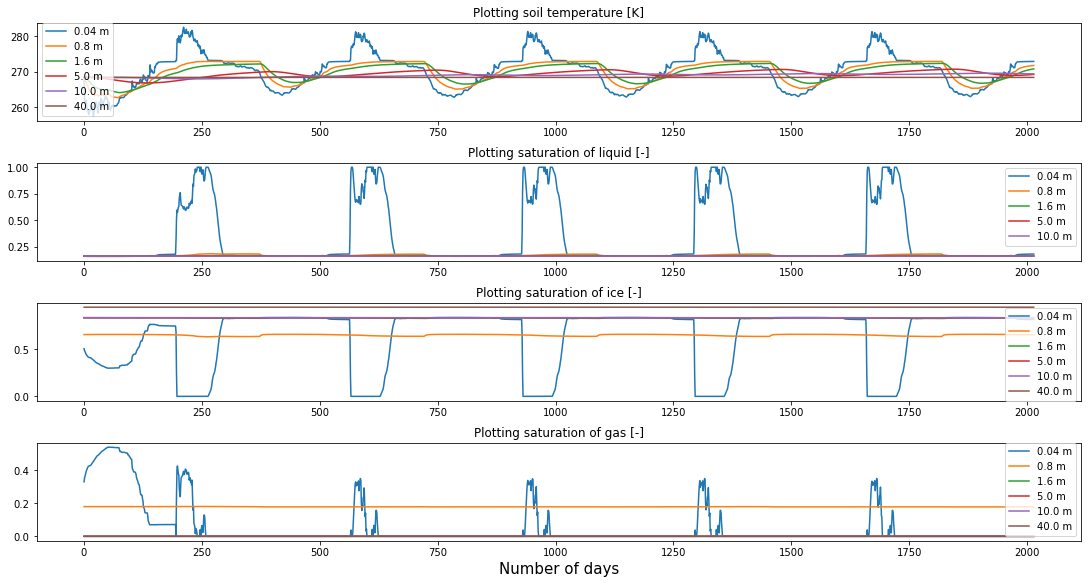

In [149]:
### Plotting the final results (mesured vs simulated) along with the parameters:
### Plotting the temperature for different alpha values at depth 0.01 m
fig2 = plt.figure(figsize=(15,8), constrained_layout=True)
spec2 = gridspec.GridSpec(ncols=1, nrows=4, height_ratios=[1,1,1,1], figure=fig2)
f2_ax1 = fig2.add_subplot(spec2[0, 0])
f2_ax2 = fig2.add_subplot(spec2[1, 0])
f2_ax3 = fig2.add_subplot(spec2[2, 0])
f2_ax4 = fig2.add_subplot(spec2[3, 0])

# Plotting temperature
f2_ax1.set_title('Plotting soil temperature [K]')
#plt.plot(df_observation['point -0.01 temperature [K]'][:1000],label='0.01 m')
f2_ax1.plot(df_observation['point -0.04 temperature [K]'],label='0.04 m')
#f2_ax1.plot(df_observation['point -0.04 temperature [K]'],'r--',label='0.04 m')
#f2_ax1.plot(df_observation['point -0.2 temperature [K]'],label='0.2 m')
#f2_ax1.plot(df_observation['point -0.4 temperature [K]'],label='0.4 m')
f2_ax1.plot(df_observation['point -0.8 temperature [K]'],label='0.8 m')
#f2_ax1.plot(df_observation['point -1.2 temperature [K]'],label='1.2 m')
f2_ax1.plot(df_observation['point -1.6 temperature [K]'],label='1.6 m')
f2_ax1.plot(df_observation['point -5.0 temperature [K]'],label='5.0 m')
f2_ax1.plot(df_observation['point -10.0 temperature [K]'],label='10.0 m')
#f2_ax1.plot(df_observation['point -20.0 temperature [K]'],label='20.0 m')
f2_ax1.plot(df_observation['point -40.0 temperature [K]'],label='40.0 m')
f2_ax1.legend()

# Plotting saturation of liquid
f2_ax2.set_title('Plotting saturation of liquid [-]')
#plt.plot(df_observation['point -0.01 temperature [K]'][:1000],label='0.01 m')
f2_ax2.plot(df_observation['point -0.04 saturation liquid'],label='0.04 m')
#f2_ax2.plot(df_observation['point -0.2 saturation liquid'],label='0.2 m')
#f2_ax2.plot(df_observation['point -0.4 saturation liquid'],label='0.4 m')
f2_ax2.plot(df_observation['point -0.8 saturation liquid'],label='0.8 m')
#f2_ax2.plot(df_observation['point -1.2 saturation liquid'],label='1.2 m')
f2_ax2.plot(df_observation['point -1.6 saturation liquid'],label='1.6 m')
f2_ax2.plot(df_observation['point -5.0 saturation liquid'],label='5.0 m')
f2_ax2.plot(df_observation['point -10.0 saturation liquid'],label='10.0 m')
#f2_ax2.plot(df_observation['point -40.0 saturation liquid'],label='40.0 m')
f2_ax2.legend()

# Plotting saturation of ice
f2_ax3.set_title('Plotting saturation of ice [-]')
#plt.plot(df_observation['point -0.01 temperature [K]'][:1000],label='0.01 m')
f2_ax3.plot(df_observation['point -0.04 saturation ice'],label='0.04 m')
#f2_ax3.plot(df_observation['point -0.2 saturation ice'],label='0.2 m')
#f2_ax3.plot(df_observation['point -0.4 saturation ice'],label='0.4 m')
f2_ax3.plot(df_observation['point -0.8 saturation ice'],label='0.8 m')
#f2_ax3.plot(df_observation['point -1.2 saturation ice'],label='1.2 m')
f2_ax3.plot(df_observation['point -1.6 saturation ice'],label='1.6 m')
f2_ax3.plot(df_observation['point -5.0 saturation ice'],label='5.0 m')
f2_ax3.plot(df_observation['point -10.0 saturation ice'],label='10.0 m')
#f2_ax3.plot(df_observation['point -20.0 saturation ice'],label='20.0 m')
f2_ax3.plot(df_observation['point -40.0 saturation ice'],label='40.0 m')
f2_ax3.legend()

# Plotting saturation of gas
f2_ax4.set_title('Plotting saturation of gas [-]')
#plt.plot(df_observation['point -0.01 temperature [K]'][:1000],label='0.01 m')
f2_ax4.plot(df_observation['point -0.04 saturation gas'],label='0.04 m')
#f2_ax4.plot(df_observation['point -0.2 saturation gas'],label='0.2 m')
#f2_ax4.plot(df_observation['point -0.4 saturation gas'],label='0.4 m')
f2_ax4.plot(df_observation['point -0.8 saturation gas'],label='0.8 m')
#f2_ax4.plot(df_observation['point -1.2 saturation gas'],label='1.2 m')
f2_ax4.plot(df_observation['point -1.6 saturation gas'],label='1.6 m')
#f2_ax4.plot(df_observation['point -1.6 saturation gas'],label='1.6 m')
f2_ax4.plot(df_observation['point -5.0 saturation gas'],label='5.0 m')
f2_ax4.plot(df_observation['point -10.0 saturation gas'],label='10.0 m')
f2_ax4.plot(df_observation['point -40.0 saturation gas'],label='40.0 m')
f2_ax4.set_xlabel('Number of days',fontsize=15)
f2_ax4.legend()

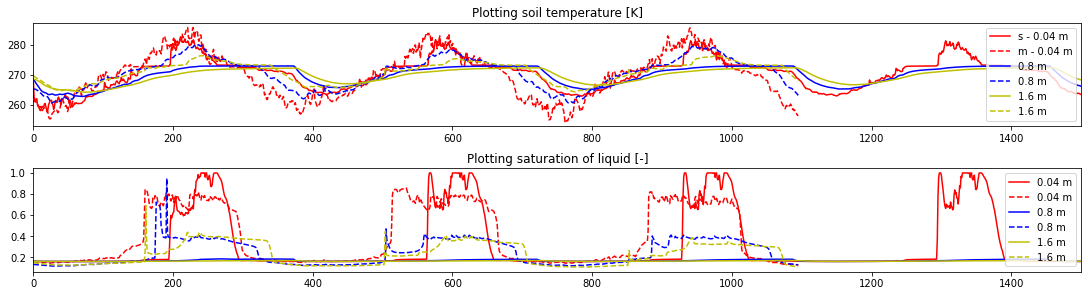

In [150]:
### Plotting the final results (mesured vs simulated) along with the parameters:
### Plotting the temperature for different alpha values at depth 0.01 m
fig2 = plt.figure(figsize=(15,4), constrained_layout=True)
spec2 = gridspec.GridSpec(ncols=1, nrows=2, height_ratios=[1,1], figure=fig2)
f2_ax1 = fig2.add_subplot(spec2[0, 0])
f2_ax2 = fig2.add_subplot(spec2[1, 0])


# Plotting temperature
f2_ax1.set_title('Plotting soil temperature [K]')
#plt.plot(df_observation['point -0.01 temperature [K]'][:1000],label='0.01 m')
f2_ax1.plot(df_observation['point -0.04 temperature [K]'],'r',label='s - 0.04 m')
f2_ax1.plot(df_obs_AWS['point -0.04 temperature [K]'].values,'r--',label='m - 0.04 m')

#f2_ax1.plot(df_observation['point -0.2 temperature [K]'],label='0.2 m')
#f2_ax1.plot(df_observation['point -0.4 temperature [K]'],label='0.4 m')
f2_ax1.plot(df_observation['point -0.8 temperature [K]'],'b',label='0.8 m')
f2_ax1.plot(df_obs_AWS['point -0.8 temperature [K]'].values,'b--',label='0.8 m')
#f2_ax1.plot(df_observation['point -1.2 temperature [K]'],label='1.2 m')
f2_ax1.plot(df_observation['point -1.6 temperature [K]'],'y',label='1.6 m')
f2_ax1.plot(df_obs_AWS['point -1.6 temperature [K]'].values,'y--',label='1.6 m')
f2_ax1.set_xlim(0,1500)
f2_ax1.legend()

# Plotting saturation of liquid
f2_ax2.set_title('Plotting saturation of liquid [-]')
#plt.plot(df_observation['point -0.01 temperature [K]'][:1000],label='0.01 m')
f2_ax2.plot(df_observation['point -0.04 saturation liquid'],'r',label='0.04 m')
f2_ax2.plot(df_obs_AWS['point -0.04 saturation liquid'].values,'r--',label='0.04 m')

#f2_ax1.plot(df_observation['point -0.2 temperature [K]'],label='0.2 m')
#f2_ax1.plot(df_observation['point -0.4 temperature [K]'],label='0.4 m')
f2_ax2.plot(df_observation['point -0.8 saturation liquid'],'b',label='0.8 m')
f2_ax2.plot(df_obs_AWS['point -0.8 saturation liquid'].values,'b--',label='0.8 m')
#f2_ax1.plot(df_observation['point -1.2 temperature [K]'],label='1.2 m')
f2_ax2.plot(df_observation['point -1.6 saturation liquid'],'y',label='1.6 m')
f2_ax2.plot(df_obs_AWS['point -1.6 saturation liquid'].values,'y--',label='1.6 m')
f2_ax2.set_xlim(0,1500)
f2_ax2.legend()

In [144]:
df_eqn_check = df_observation.iloc[1:,:].copy()

no_itr = 9

all_columns = df_eqn_check.columns

#for i, cols in enumerate(all_columns):
for i in np.arange(0,9,1):
    for j in np.arange(365):
        df_eqn_check.iloc[j+i*365,:] = df_observation.iloc[j+i*365,:] - df_observation.iloc[j+i*365+365,:]
        #print(j+i*365)
    #df_eqn_check.iloc[]
    #print(cols)
df_eqn_check.head()   

,time [s],water content [mol],surface water content [mol],snow water equivalent [mol],evaporation rate [m s^-1],discharge [mol s^-1],surface-subsurface flux [mol s^-1],precipitation rain [m s^-1],precipitation snow [m s^-1],snow melt [m s^-1],...,point -0.4 saturation gas,point -0.8 saturation gas,point -1.2 saturation gas,point -1.6 saturation gas,point -5.0 saturation gas,point -10.0 saturation gas,point -20.0 saturation gas,point -30.0 saturation gas,point -40.0 saturation gas,time [days]
time [days],,,,,,,,,,,,,,,,,,,,,
1.0,-31536000.0,-7936.518701,-1052.639022,-0.124036,1.697255e-09,0.0,-9.782140e-12,0.0,0.0,0.0,...,0.380012,0.179538,-0.000636,-0.000288,0.0,0.0,0.0,0.0,0.0,-365.0
2.0,-31536000.0,-7963.478608,-1052.639023,-0.123353,-9.901595e-10,0.0,-9.926095e-12,0.0,0.0,0.0,...,0.380011,0.179541,-0.000637,-0.000289,0.0,0.0,0.0,0.0,0.0,-365.0
3.0,-31536000.0,-7979.523801,-1052.639024,-0.123129,7.624564e-10,0.0,-9.007082e-12,0.0,0.0,0.0,...,0.380015,0.179545,-0.000637,-0.000289,0.0,0.0,0.0,0.0,0.0,-365.0
4.0,-31536000.0,-7995.614173,-1052.639025,-0.122752,-9.972265e-10,0.0,-8.360722e-12,0.0,0.0,0.0,...,0.380019,0.179550,-0.000636,-0.000289,0.0,0.0,0.0,0.0,0.0,-365.0
5.0,-31536000.0,-8015.369839,-1052.639026,-0.122150,-2.844636e-09,0.0,-8.661977e-12,0.0,0.0,0.0,...,0.380022,0.179556,-0.000635,-0.000288,0.0,0.0,0.0,0.0,0.0,-365.0


In [145]:
df_eqn_check = df_eqn_check.iloc[:3285]

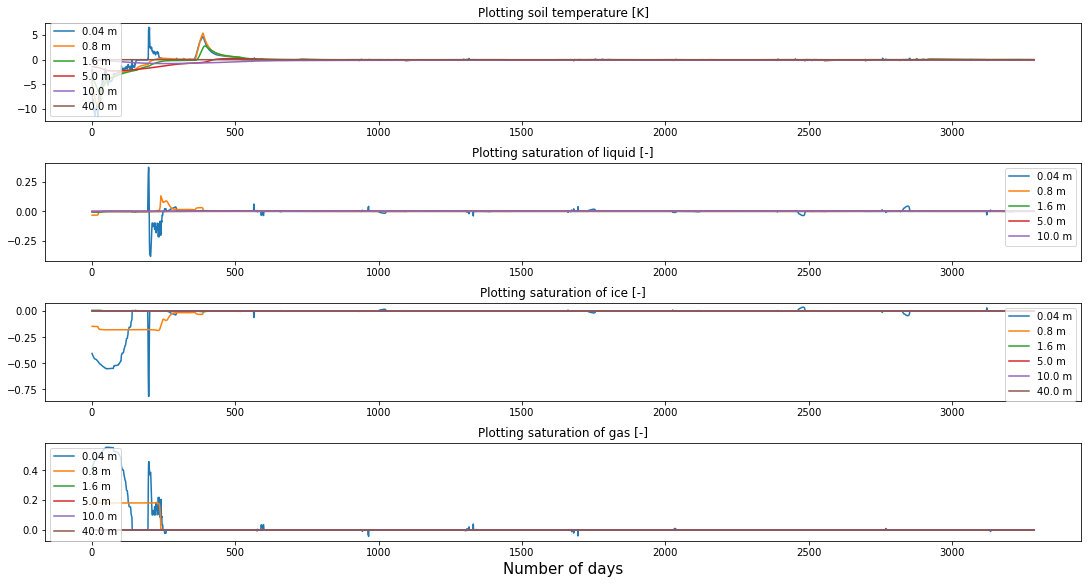

In [146]:
### Plotting the final results (mesured vs simulated) along with the parameters:
### Plotting the temperature for different alpha values at depth 0.01 m
fig2 = plt.figure(figsize=(15,8), constrained_layout=True)
spec2 = gridspec.GridSpec(ncols=1, nrows=4, height_ratios=[1,1,1,1], figure=fig2)
f2_ax1 = fig2.add_subplot(spec2[0, 0])
f2_ax2 = fig2.add_subplot(spec2[1, 0])
f2_ax3 = fig2.add_subplot(spec2[2, 0])
f2_ax4 = fig2.add_subplot(spec2[3, 0])

# Plotting temperature
f2_ax1.set_title('Plotting soil temperature [K]')
#plt.plot(df_observation['point -0.01 temperature [K]'][:1000],label='0.01 m')
f2_ax1.plot(df_eqn_check['point -0.04 temperature [K]'],label='0.04 m')
#f2_ax1.plot(df_observation['point -0.04 temperature [K]'],'r--',label='0.04 m')
#f2_ax1.plot(df_observation['point -0.2 temperature [K]'],label='0.2 m')
#f2_ax1.plot(df_observation['point -0.4 temperature [K]'],label='0.4 m')
f2_ax1.plot(df_eqn_check['point -0.8 temperature [K]'],label='0.8 m')
#f2_ax1.plot(df_observation['point -1.2 temperature [K]'],label='1.2 m')
f2_ax1.plot(df_eqn_check['point -1.6 temperature [K]'],label='1.6 m')
f2_ax1.plot(df_eqn_check['point -5.0 temperature [K]'],label='5.0 m')
f2_ax1.plot(df_eqn_check['point -10.0 temperature [K]'],label='10.0 m')
#f2_ax1.plot(df_observation['point -20.0 temperature [K]'],label='20.0 m')
f2_ax1.plot(df_eqn_check['point -40.0 temperature [K]'],label='40.0 m')
f2_ax1.legend()

# Plotting saturation of liquid
f2_ax2.set_title('Plotting saturation of liquid [-]')
#plt.plot(df_observation['point -0.01 temperature [K]'][:1000],label='0.01 m')
f2_ax2.plot(df_eqn_check['point -0.04 saturation liquid'],label='0.04 m')
#f2_ax2.plot(df_observation['point -0.2 saturation liquid'],label='0.2 m')
#f2_ax2.plot(df_observation['point -0.4 saturation liquid'],label='0.4 m')
f2_ax2.plot(df_eqn_check['point -0.8 saturation liquid'],label='0.8 m')
#f2_ax2.plot(df_observation['point -1.2 saturation liquid'],label='1.2 m')
f2_ax2.plot(df_eqn_check['point -1.6 saturation liquid'],label='1.6 m')
f2_ax2.plot(df_eqn_check['point -5.0 saturation liquid'],label='5.0 m')
f2_ax2.plot(df_eqn_check['point -10.0 saturation liquid'],label='10.0 m')
#f2_ax2.plot(df_eqn_check['point -40.0 saturation liquid'],label='40.0 m')
f2_ax2.legend()

# Plotting saturation of ice
f2_ax3.set_title('Plotting saturation of ice [-]')
#plt.plot(df_observation['point -0.01 temperature [K]'][:1000],label='0.01 m')
f2_ax3.plot(df_eqn_check['point -0.04 saturation ice'],label='0.04 m')
#f2_ax3.plot(df_observation['point -0.2 saturation ice'],label='0.2 m')
#f2_ax3.plot(df_observation['point -0.4 saturation ice'],label='0.4 m')
f2_ax3.plot(df_eqn_check['point -0.8 saturation ice'],label='0.8 m')
#f2_ax3.plot(df_observation['point -1.2 saturation ice'],label='1.2 m')
f2_ax3.plot(df_eqn_check['point -1.6 saturation ice'],label='1.6 m')
f2_ax3.plot(df_eqn_check['point -5.0 saturation ice'],label='5.0 m')
f2_ax3.plot(df_eqn_check['point -10.0 saturation ice'],label='10.0 m')
#f2_ax3.plot(df_observation['point -20.0 saturation ice'],label='20.0 m')
f2_ax3.plot(df_eqn_check['point -40.0 saturation ice'],label='40.0 m')
f2_ax3.legend()

# Plotting saturation of gas
f2_ax4.set_title('Plotting saturation of gas [-]')
#plt.plot(df_observation['point -0.01 temperature [K]'][:1000],label='0.01 m')
f2_ax4.plot(df_eqn_check['point -0.04 saturation gas'],label='0.04 m')
#f2_ax4.plot(df_observation['point -0.2 saturation gas'],label='0.2 m')
#f2_ax4.plot(df_observation['point -0.4 saturation gas'],label='0.4 m')
f2_ax4.plot(df_eqn_check['point -0.8 saturation gas'],label='0.8 m')
#f2_ax4.plot(df_observation['point -1.2 saturation gas'],label='1.2 m')
f2_ax4.plot(df_eqn_check['point -1.6 saturation gas'],label='1.6 m')
#f2_ax4.plot(df_observation['point -1.6 saturation gas'],label='1.6 m')
f2_ax4.plot(df_eqn_check['point -5.0 saturation gas'],label='5.0 m')
f2_ax4.plot(df_eqn_check['point -10.0 saturation gas'],label='10.0 m')
f2_ax4.plot(df_eqn_check['point -40.0 saturation gas'],label='40.0 m')
f2_ax4.set_xlabel('Number of days',fontsize=15)
f2_ax4.legend()